In [2]:
import sys
sys.path.insert(0, '..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1
import glob
import os
import pandas as pd
from IPython.display import display
import numpy as np

Funktionen erfolgreich definiert:
1. fit_exponential_decay(data_frames)
2. plot_data_with_fits(results, title, save_path, uniform_axes)
3. plot_parameter_histograms(results, save_path, figsize)
4. fit_linear(data_frames)
5. plot_linear_fits(results, title, save_path, uniform_axes)
6. plot_slope_histogram(results, save_path, figsize)


In [3]:
# Funktion zur Verarbeitung der Influx-Daten
def Influx_data(df1, x, y, z, w):
    """
    Erstellt einen DataFrame mit Mittelwerten und Standardabweichungen
    aus einem CSV-DataFrame und vier Zeilenindizes.
    
    Parameter:
    - df1: Eingabe-DataFrame (aus CSV)
    - x, y, z, w: Zeilenindizes für Zeit und die drei Messungen
    
    Rückgabe:
    - DataFrame mit Spalten: Time, 1.Messung, 2.Messung, 3.Messung, 
      Mittelwerte, Standardabweichung
    """
    df1 = df1.replace('OVER', np.nan)
    mM_10 = pd.DataFrame()
    mM_1= pd.DataFrame()
    mM_0_1 = pd.DataFrame()
    results = pd.DataFrame()
    results["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    mM_10["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    mM_1["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    mM_0_1["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    #10mM    
    mM_10["1.Messung"] = df_d0(to_float_array(np.array(df1.iloc[y])[1:]))
    mM_10["2.Messung"] = df_d0(to_float_array(np.array(df1.iloc[z])[1:]))
    mM_10["3.Messung"] = df_d0(to_float_array(np.array(df1.iloc[w])[1:]))
    
    # Berechne Mittelwert über die ersten drei Messung-Spalten
    mittelwerte1 = mM_10[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    results["10 mM Mittelwerte"] = mittelwerte1
    
    # Berechne Standardabweichung
    standardabweichung1 = mM_10[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    results["10 mM Standardabweichung"] = standardabweichung1
    
    #1mM
       
    mM_1["1.Messung"] = df_d0(to_float_array(np.array(df1.iloc[y+3])[1:]))
    mM_1["2.Messung"] = df_d0(to_float_array(np.array(df1.iloc[z+3])[1:]))
    mM_1["3.Messung"] = df_d0(to_float_array(np.array(df1.iloc[w+3])[1:]))
    
    # Berechne Mittelwert über die ersten drei Messung-Spalten
    mittelwerte2 = mM_1[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    results["1 mM Mittelwerte"] = mittelwerte2
    
    # Berechne Standardabweichung
    standardabweichung2 = mM_1[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    results["1 mM Standardabweichung"] = standardabweichung2
    
    #0,1 mM
    #10mM    
    mM_0_1["1.Messung"] = df_d0(to_float_array(np.array(df1.iloc[y+6])[1:]))
    mM_0_1["2.Messung"] = df_d0(to_float_array(np.array(df1.iloc[z+6])[1:]))
    mM_0_1["3.Messung"] = df_d0(to_float_array(np.array(df1.iloc[w+6])[1:]))
    
    # Berechne Mittelwert über die ersten drei Messung-Spalten
    mittelwerte3 = mM_0_1[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    results["0,1 mM Mittelwerte"] = mittelwerte3
    
    # Berechne Standardabweichung
    standardabweichung3 = mM_0_1[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    results["0,1 mM Standardabweichung"] = standardabweichung3
    
    
    # Stelle sicher, dass 'Time' numeric ist
    
    merged = mM_10.merge(mM_1, on='Time', how='outer', suffixes=('_10','_1'))
    merged = merged.merge(mM_0_1, on='Time', how='outer')
    merged = merged.sort_values('Time').reset_index(drop=True)
    return results, merged

In [4]:
# MCT1 Data laden
data_path1 = '/workspaces/EWT/EWT4/DATA/ETW4.ods'
df_E_MCT1_ilacco1_0 = pd.read_excel(data_path1, engine='odf', sheet_name="Sheet11", skiprows=36)
df_E_MCT1_ilacco1_0_50µM_CCCP = pd.read_excel(data_path1, engine='odf', sheet_name="Sheet4", skiprows=36)
df_E_MCT1_ilacco1_1 = pd.read_excel(data_path1, engine='odf', sheet_name="Sheet12", skiprows=36)
df_E_MCT1_ilacco1_2 = pd.read_excel(data_path1, engine='odf', sheet_name="Sheet15", skiprows=36)
df_E_MCT1_ilacco1_1_50µM_CCCP = pd.read_excel(data_path1, engine='odf', sheet_name="Sheet16", skiprows=36)

E_MCT1_ilacco1_0 = dataframe1(df_E_MCT1_ilacco1_0,3,5,6,7)
E_MCT1_ilacco1_0_50μM_CCCP = dataframe1(df_E_MCT1_ilacco1_0_50μM_CCCP,3,8,9,10)
E_MCT1_ilacco1_1 = dataframe1(df_E_MCT1_ilacco1_1,3,5,6,7)
E_MCT1_ilacco1_2 = dataframe1(df_E_MCT1_ilacco1_2,3,5,6,7)
E_MCT1_ilacco1_1_50μM_CCCP = dataframe1(df_E_MCT1_ilacco1_1_50μM_CCCP,3,5,6,7)

# Daten einlesen in Dataframes
I_data_path = '/workspaces/EWT/EWT4/DATA/ETW4.ods'
df_I_MCT1_ilacco1_0 = pd.read_excel(I_data_path, engine='odf', sheet_name="Sheet3", skiprows=36)
df_I_MCT1_ilacco1_0_50µM_CCCP = pd.read_excel(I_data_path, engine='odf', sheet_name="Sheet4", skiprows=36)
df_I_MCT1_ilacco1_1= pd.read_excel(I_data_path, engine='odf', sheet_name="Sheet5", skiprows=36)
df_I_MCT1_ilacco1_2= pd.read_excel(I_data_path, engine='odf', sheet_name="Sheet6", skiprows=36)

# Daten verarbeiten
I_MCT1_ilacco1_0, M1 = Influx_data(df_I_MCT1_ilacco1_0,3,5,6,7)
I_MCT1_ilacco1_0_50μM_CCCP, M2 = Influx_data(df_I_MCT1_ilacco1_0_50μM_CCCP,3,5,6,7)
I_MCT1_ilacco1_1,M3 = Influx_data(df_I_MCT1_ilacco1_1,3,5,6,7)
I_MCT1_ilacco1_2, M4 = Influx_data(df_I_MCT1_ilacco1_2,3,5,6,7)


In [5]:
# laden EWT export
data_path2 = '/workspaces/EWT/EWT5/data/EWT5_mit_Notizen.ods'
df_E_BSG_MCT1_ilacco1_0 = pd.read_excel(data_path2, engine='odf', sheet_name="Sheet9", skiprows=36)
df_E_BSG_MCT1_ilacco1_1 = pd.read_excel(data_path2, engine='odf', sheet_name="Sheet7", skiprows=36)
df_E_BSG_MCT1_ilacco1_2 = pd.read_excel(data_path2, engine='odf', sheet_name="Sheet8", skiprows=36)
df_E_BSG_MCT1_ilacco1_0_50µM_CCCP = pd.read_excel(data_path2, engine='odf', sheet_name="Sheet10", skiprows=36)
df_E_BSG_MCT1_ilacco1_1_50µM_CCCP = pd.read_excel(data_path2, engine='odf', sheet_name="Sheet11", skiprows=36)
df_E_BSG_MCT1_ilacco1_2_50µM_CCCP = pd.read_excel(data_path2, engine='odf', sheet_name="Sheet12", skiprows=36)
#print(df_E_BSG_MCT1_ilacco1_0)

E_BSG_MCT1_ilacco1_0 = dataframe1(df_E_BSG_MCT1_ilacco1_0,3,5,6,7)
E_BSG_MCT1_ilacco1_1 = dataframe1(df_E_BSG_MCT1_ilacco1_1,3,5,6,7)
E_BSG_MCT1_ilacco1_2 = dataframe1(df_E_BSG_MCT1_ilacco1_2,3,5,6,7)
E_BSG_MCT1_ilacco1_0_50μM_CCCP = dataframe1(df_E_BSG_MCT1_ilacco1_0_50μM_CCCP,3,5,6,7)
E_BSG_MCT1_ilacco1_1_50μM_CCCP = dataframe1(df_E_BSG_MCT1_ilacco1_1_50μM_CCCP,3,5,6,7)
E_BSG_MCT1_ilacco1_2_50μM_CCCP = dataframe1(df_E_BSG_MCT1_ilacco1_2_50μM_CCCP,3,5,6,7)

# Daten einlesen in Dataframes
I_data_path2 = '/workspaces/EWT/EWT5/data/EWT5_mit_Notizen.ods'
df_I_BSG_MCT1_ilacco1_0 = pd.read_excel(I_data_path2, engine='odf', sheet_name="Sheet1", skiprows=36)
df_I_BSG_MCT1_ilacco1_1= pd.read_excel(I_data_path2, engine='odf', sheet_name="Sheet3", skiprows=36)
df_I_BSG_MCT1_ilacco1_2= pd.read_excel(I_data_path2, engine='odf', sheet_name="Sheet4", skiprows=36)
df_I_BSG_MCT1_ilacco1_0_50µM_CCCP = pd.read_excel(I_data_path2, engine='odf', sheet_name="Sheet5", skiprows=36)
df_I_BSG_MCT1_ilacco1_1_50µM_CCCP = pd.read_excel(I_data_path2, engine='odf', sheet_name="Sheet14", skiprows=36)
df_I_BSG_MCT1_ilacco1_2_50µM_CCCP = pd.read_excel(I_data_path2, engine='odf', sheet_name="Sheet15", skiprows=36)

# Daten verarbeiten
I_BSG_MCT1_ilacco1_0, M1 = Influx_data(df_I_BSG_MCT1_ilacco1_0,3,5,6,7)
I_BSG_MCT1_ilacco1_1,M2 = Influx_data(df_I_BSG_MCT1_ilacco1_1,3,5,6,7)
I_BSG_MCT1_ilacco1_2, M3 = Influx_data(df_I_BSG_MCT1_ilacco1_2,3,5,6,7)
I_BSG_MCT1_ilacco1_0_50μM_CCCP, M4 = Influx_data(df_I_BSG_MCT1_ilacco1_0_50μM_CCCP,3,5,6,7)
I_BSG_MCT1_ilacco1_1_50μM_CCCP, M5 = Influx_data(df_I_BSG_MCT1_ilacco1_1_50μM_CCCP,3,5,6,7)
I_BSG_MCT1_ilacco1_2_50μM_CCCP, M6 = Influx_data(df_I_BSG_MCT1_ilacco1_2_50μM_CCCP,3,5,6,7)

In [6]:
#EWT 6 data load
data_path3 = '/workspaces/EWT/EWT6/data/ETW6.ods'
df_E_PfFNT_ilacco1_0 = pd.read_excel(data_path3, engine='odf', sheet_name="Sheet12", skiprows=36)
df_E_PfFNT_ilacco1_1 = pd.read_excel(data_path3, engine='odf', sheet_name="Sheet13", skiprows=36)
df_E_PfFNT_ilacco1_2 = pd.read_excel(data_path3, engine='odf', sheet_name="Sheet14", skiprows=36)
df_E_PfFNT_FP_ilacco1_0 = pd.read_excel(data_path3, engine='odf', sheet_name="Sheet15", skiprows=36)
df_E_PfFNT_ilacco1_0_50µM_CCCP = pd.read_excel(data_path3, engine='odf', sheet_name="Sheet16", skiprows=36)
df_E_PfFNT_ilacco1_1_50µM_CCCP = pd.read_excel(data_path3, engine='odf', sheet_name="Sheet17", skiprows=36)
df_E_PfFNT_ilacco1_2_50µM_CCCP = pd.read_excel(data_path3, engine='odf', sheet_name="Sheet18", skiprows=36)
df_E_PfFNT_FP_ilacco1_0_50μM_CCCP = pd.read_excel(data_path3, engine='odf', sheet_name="Sheet19", skiprows=36)
#print(df_E_PfFNT_ilacco1_0)
E_PfFNT_ilacco1_0 = dataframe1(df_E_PfFNT_ilacco1_0,3,5,6,7)
E_PfFNT_ilacco1_1 = dataframe1(df_E_PfFNT_ilacco1_1,3,5,6,7)
E_PfFNT_ilacco1_2 = dataframe1(df_E_PfFNT_ilacco1_2,3,5,6,7)
E_PfFNT_FP_ilacco1_0 = dataframe1(df_E_PfFNT_FP_ilacco1_0,3,5,6,7)
E_PfFNT_ilacco1_0_50μM_CCCP = dataframe1(df_E_PfFNT_ilacco1_0_50μM_CCCP,3,5,6,7)
E_PfFNT_ilacco1_1_50μM_CCCP = dataframe1(df_E_PfFNT_ilacco1_1_50μM_CCCP,3,5,6,7)
E_PfFNT_ilacco1_2_50μM_CCCP = dataframe1(df_E_PfFNT_ilacco1_2_50μM_CCCP,3,5,6,7)
E_PfFNT_FP_ilacco1_0_50μM_CCCP = dataframe1(df_E_PfFNT_FP_ilacco1_0_50μM_CCCP,3,5,6,7)

# Daten einlesen in Dataframes
# Daten einlesen in Dataframes
I_data_path3 = '/workspaces/EWT/EWT6/data/ETW6.ods'
df_I_PfFNT_ilacco1_0 = pd.read_excel(I_data_path3, engine='odf', sheet_name="Sheet1", skiprows=37)
df_I_PfFNT_ilacco1_1= pd.read_excel(I_data_path3, engine='odf', sheet_name="Sheet4", skiprows=36)
df_I_PfFNT_ilacco1_2= pd.read_excel(I_data_path3, engine='odf', sheet_name="Sheet6", skiprows=36)
df_I_PfFNT_FP_ilacco1 = pd.read_excel(I_data_path3, engine='odf', sheet_name="Sheet7", skiprows=36)
df_I_PfFNT_ilacco1_0_50µM_CCCP = pd.read_excel(I_data_path3, engine='odf', sheet_name="Sheet8", skiprows=36)
df_I_PfFNT_ilacco1_1_50µM_CCCP = pd.read_excel(I_data_path3, engine='odf', sheet_name="Sheet9", skiprows=36)
df_I_PfFNT_ilacco1_2_50µM_CCCP = pd.read_excel(I_data_path3, engine='odf', sheet_name="Sheet10", skiprows=36)
df_I_PfFNT_FP_ilacco1_50µM_CCCP = pd.read_excel(I_data_path3, engine='odf', sheet_name="Sheet11", skiprows=36)


# Daten verarbeiten
I_PfFNT_ilacco1_0, M1 = Influx_data(df_I_PfFNT_ilacco1_0,3,5,6,7)
I_PfFNT_ilacco1_1,M2 = Influx_data(df_I_PfFNT_ilacco1_1,3,5,6,7)
I_PfFNT_ilacco1_2, M3 = Influx_data(df_I_PfFNT_ilacco1_2,3,5,6,7)
I_PfFNT_FP_ilacco1, M4 = Influx_data(df_I_PfFNT_FP_ilacco1,3,5,6,7)
I_PfFNT_ilacco1_0_50μM_CCCP, M5 = Influx_data(df_I_PfFNT_ilacco1_0_50μM_CCCP,3,5,6,7)
I_PfFNT_ilacco1_1_50μM_CCCP, M6 = Influx_data(df_I_PfFNT_ilacco1_1_50μM_CCCP,3,5,6,7)
I_PfFNT_ilacco1_2_50μM_CCCP, M7 = Influx_data(df_I_PfFNT_ilacco1_2_50μM_CCCP,3,5,6,7)
I_PfFNT_FP_ilacco1_50μM_CCCP, M8 = Influx_data(df_I_PfFNT_FP_ilacco1_50μM_CCCP,3,5,6,7)



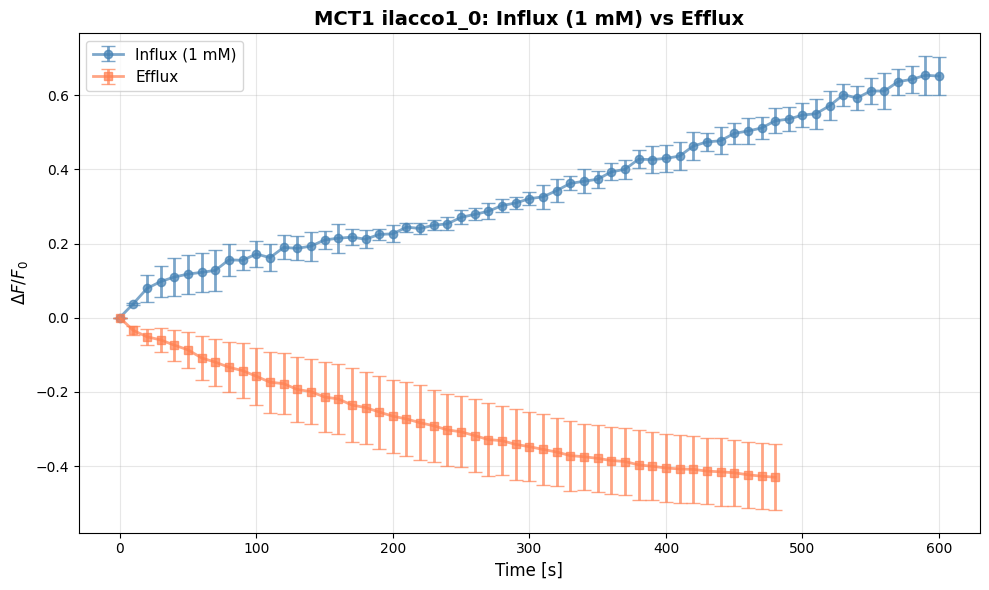

Plot gespeichert als: MCT1_ilacco1_0_Influx_vs_Efflux.png


In [7]:
# Plot: 1 mM Influx (I_MCT1_ilacco1_0) vs Efflux (E_MCT1_ilacco1_0)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Influx Daten: 1 mM Kurve
times_influx = I_MCT1_ilacco1_0["Time"].values
influx_1mM = I_MCT1_ilacco1_0["1 mM Mittelwerte"].values
influx_1mM_std = I_MCT1_ilacco1_0["1 mM Standardabweichung"].values

# Efflux Daten
times_efflux = E_MCT1_ilacco1_0["Time"].values
efflux_mean = E_MCT1_ilacco1_0["Mittelwerte"].values
efflux_std = E_MCT1_ilacco1_0["Standardabweichung"].values

# Plot Influx (1 mM)
ax.errorbar(times_influx, influx_1mM, yerr=influx_1mM_std, 
           marker='o', linestyle='-', label='Influx (1 mM)', 
           capsize=5, markersize=6, alpha=0.7, color='steelblue', linewidth=2)

# Plot Efflux
ax.errorbar(times_efflux, efflux_mean, yerr=efflux_std, 
           marker='s', linestyle='-', label='Efflux', 
           capsize=5, markersize=6, alpha=0.7, color='coral', linewidth=2)

ax.set_xlabel('Time [s]', fontsize=12)
ax.set_ylabel(r'$\Delta F/F_0$', fontsize=12)
ax.set_title('MCT1 ilacco1_0: Influx (1 mM) vs Efflux', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
ax.legend(fontsize=11, loc='best')
plt.tight_layout()
plt.savefig('MCT1_ilacco1_0_Influx_vs_Efflux.png', dpi=300, bbox_inches='tight')
plt.show()

print("Plot gespeichert als: MCT1_ilacco1_0_Influx_vs_Efflux.png")

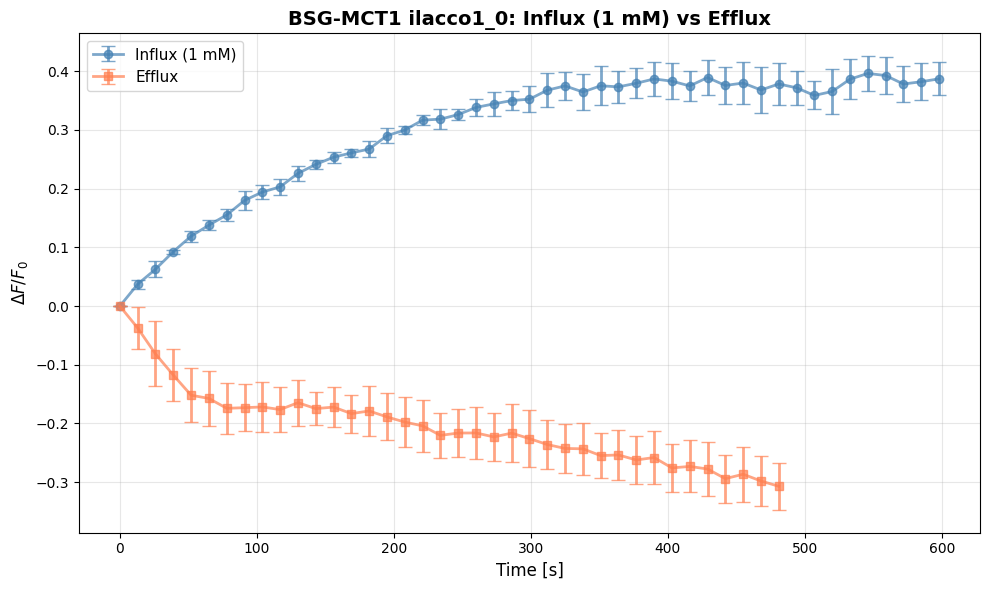

Plot gespeichert als: BSG_MCT1_ilacco1_0_Influx_vs_Efflux.png


In [8]:
# Plot: 1 mM Influx (I_BSG_MCT1_ilacco1_0) vs Efflux (E_BSG_MCT1_ilacco1_0)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Influx Daten: 1 mM Kurve
times_influx = I_BSG_MCT1_ilacco1_0["Time"].values
influx_1mM = I_BSG_MCT1_ilacco1_0["1 mM Mittelwerte"].values
influx_1mM_std = I_BSG_MCT1_ilacco1_0["1 mM Standardabweichung"].values

# Efflux Daten
times_efflux = E_BSG_MCT1_ilacco1_0["Time"].values
efflux_mean = E_BSG_MCT1_ilacco1_0["Mittelwerte"].values
efflux_std = E_BSG_MCT1_ilacco1_0["Standardabweichung"].values

# Plot Influx (1 mM)
ax.errorbar(times_influx, influx_1mM, yerr=influx_1mM_std, 
           marker='o', linestyle='-', label='Influx (1 mM)', 
           capsize=5, markersize=6, alpha=0.7, color='steelblue', linewidth=2)

# Plot Efflux
ax.errorbar(times_efflux, efflux_mean, yerr=efflux_std, 
           marker='s', linestyle='-', label='Efflux', 
           capsize=5, markersize=6, alpha=0.7, color='coral', linewidth=2)

ax.set_xlabel('Time [s]', fontsize=12)
ax.set_ylabel(r'$\Delta F/F_0$', fontsize=12)
ax.set_title('BSG-MCT1 ilacco1_0: Influx (1 mM) vs Efflux', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
ax.legend(fontsize=11, loc='best')
plt.tight_layout()
plt.savefig('BSG_MCT1_ilacco1_0_Influx_vs_Efflux.png', dpi=300, bbox_inches='tight')
plt.show()

print("Plot gespeichert als: BSG_MCT1_ilacco1_0_Influx_vs_Efflux.png")

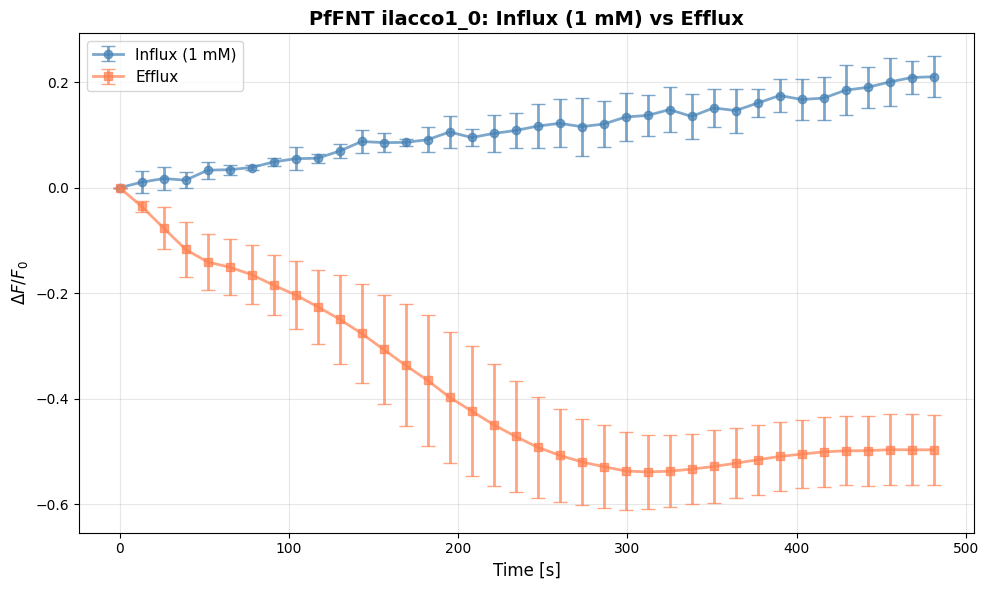

Plot gespeichert als: PfFNT_ilacco1_0_Influx_vs_Efflux.png


In [9]:
# Plot: 1 mM Influx (I_PfFNT_ilacco1_0) vs Efflux (E_PfFNT_ilacco1_0)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Influx Daten: 1 mM Kurve
times_influx = I_PfFNT_ilacco1_0["Time"].values
influx_1mM = I_PfFNT_ilacco1_0["1 mM Mittelwerte"].values
influx_1mM_std = I_PfFNT_ilacco1_0["1 mM Standardabweichung"].values

# Efflux Daten
times_efflux = E_PfFNT_ilacco1_0["Time"].values
efflux_mean = E_PfFNT_ilacco1_0["Mittelwerte"].values
efflux_std = E_PfFNT_ilacco1_0["Standardabweichung"].values

# Plot Influx (1 mM)
ax.errorbar(times_influx, influx_1mM, yerr=influx_1mM_std, 
           marker='o', linestyle='-', label='Influx (1 mM)', 
           capsize=5, markersize=6, alpha=0.7, color='steelblue', linewidth=2)

# Plot Efflux
ax.errorbar(times_efflux, efflux_mean, yerr=efflux_std, 
           marker='s', linestyle='-', label='Efflux', 
           capsize=5, markersize=6, alpha=0.7, color='coral', linewidth=2)

ax.set_xlabel('Time [s]', fontsize=12)
ax.set_ylabel(r'$\Delta F/F_0$', fontsize=12)
ax.set_title('PfFNT ilacco1_0: Influx (1 mM) vs Efflux', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
ax.legend(fontsize=11, loc='best')
plt.tight_layout()
plt.savefig('PfFNT_ilacco1_0_Influx_vs_Efflux.png', dpi=300, bbox_inches='tight')
plt.show()

print("Plot gespeichert als: PfFNT_ilacco1_0_Influx_vs_Efflux.png")

Saved: Influx_vs_Efflux_Linear_Fits_60s.png


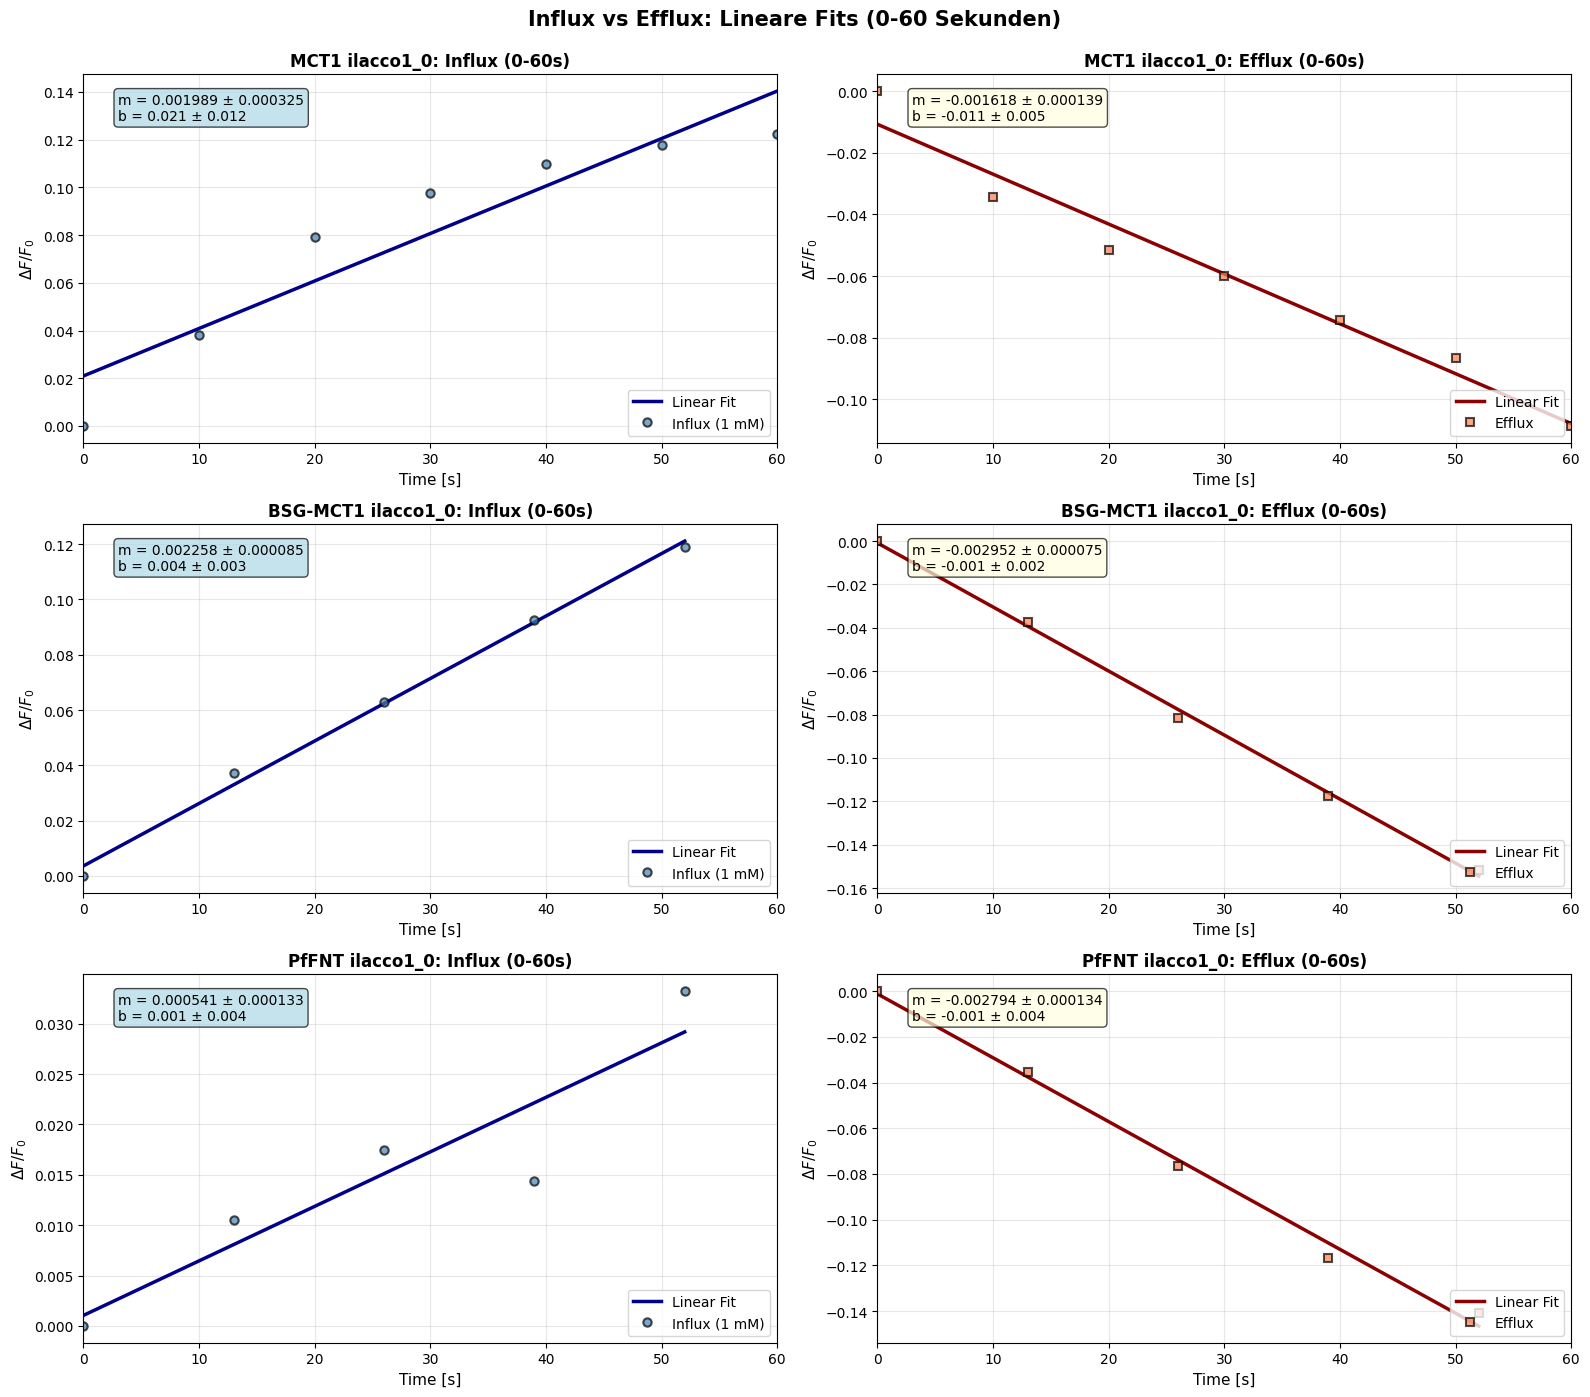

Saved: Influx_vs_Efflux_Slopes_Comparison.png


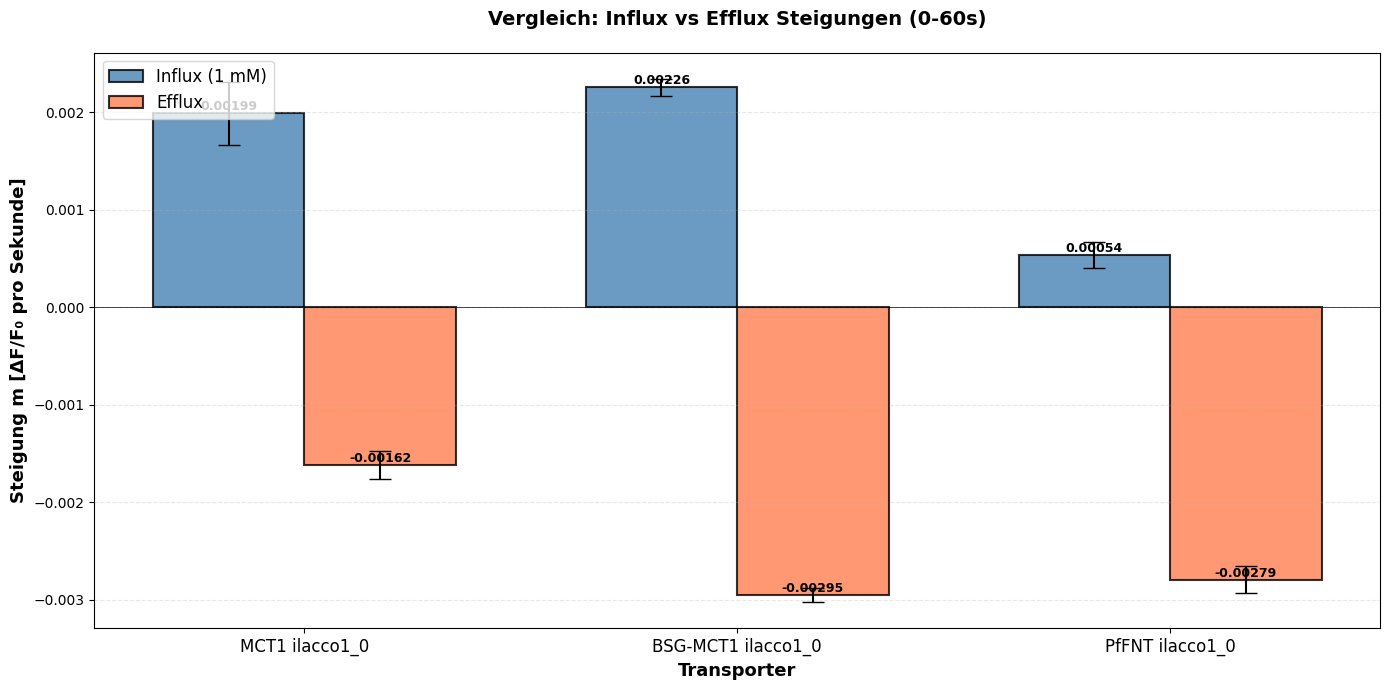


ZUSAMMENFASSUNG: Lineare Fits (0-60 Sekunden)

MCT1 ilacco1_0:
  Influx (1 mM):  m = 0.001989 ± 0.000325
  Efflux:         m = -0.001618 ± 0.000139
  Verhältnis (Influx/Efflux): -1.229
  Differenz (Influx - Efflux): 0.003607

BSG-MCT1 ilacco1_0:
  Influx (1 mM):  m = 0.002258 ± 0.000085
  Efflux:         m = -0.002952 ± 0.000075
  Verhältnis (Influx/Efflux): -0.765
  Differenz (Influx - Efflux): 0.005211

PfFNT ilacco1_0:
  Influx (1 mM):  m = 0.000541 ± 0.000133
  Efflux:         m = -0.002794 ± 0.000134
  Verhältnis (Influx/Efflux): -0.194
  Differenz (Influx - Efflux): 0.003335



In [10]:
# Linearer Fit in den ersten 60 Sekunden: Influx vs Efflux
# Vergleich der Steigungen für MCT1, BSG-MCT1, PfFNT

import numpy as np
import matplotlib.pyplot as plt

# Funktion für linearen Fit mit Unsicherheiten
def linear_fit_60s(times, means, time_limit=60):
    """
    Führt linearen Fit für Daten bis time_limit durch
    Gibt Steigung, y-Achsenabschnitt und deren Fehler zurück
    """
    mask = times <= time_limit
    times_fit = times[mask]
    means_fit = means[mask]
    
    # Entferne NaN-Werte
    valid_mask = ~(np.isnan(times_fit) | np.isnan(means_fit))
    times_clean = times_fit[valid_mask]
    means_clean = means_fit[valid_mask]
    
    # Linearer Fit
    coeffs = np.polyfit(times_clean, means_clean, 1)
    m_fit, b_fit = coeffs
    
    # Berechne Unsicherheiten
    y_pred = np.polyval(coeffs, times_clean)
    residuals = means_clean - y_pred
    s_err = np.sqrt(np.sum(residuals**2) / (len(times_clean) - 2))
    t_mean = np.mean(times_clean)
    s_xx = np.sum((times_clean - t_mean)**2)
    m_err = s_err / np.sqrt(s_xx)
    b_err = s_err * np.sqrt(1/len(times_clean) + t_mean**2/s_xx)
    
    return m_fit, m_err, b_fit, b_err, times_clean, means_clean

# Datensätze definieren
datasets = [
    ('MCT1 ilacco1_0', I_MCT1_ilacco1_0, E_MCT1_ilacco1_0),
    ('BSG-MCT1 ilacco1_0', I_BSG_MCT1_ilacco1_0, E_BSG_MCT1_ilacco1_0),
    ('PfFNT ilacco1_0', I_PfFNT_ilacco1_0, E_PfFNT_ilacco1_0)
]

# Ergebnisse sammeln
results = []

# Erstelle 3x2 Subplot-Grid für individuelle Fits
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

for row, (name, influx_data, efflux_data) in enumerate(datasets):
    # Influx Fit (linke Spalte)
    ax_influx = axes[row, 0]
    
    times_influx = influx_data["Time"].values
    means_influx = influx_data["1 mM Mittelwerte"].values
    stds_influx = influx_data["1 mM Standardabweichung"].values
    
    m_influx, m_err_influx, b_influx, b_err_influx, t_clean_influx, y_clean_influx = linear_fit_60s(
        times_influx, means_influx, 60
    )
    
    # Plot Influx Daten
    ax_influx.errorbar(t_clean_influx, y_clean_influx, 
                      marker='o', linestyle='', capsize=4,
                      markerfacecolor='steelblue', markeredgecolor='black',
                      markeredgewidth=1.5, markersize=6,
                      label='Influx (1 mM)', alpha=0.7, color='steelblue')
    
    # Plot Influx Fit
    t_fit = np.linspace(t_clean_influx.min(), t_clean_influx.max(), 200)
    y_fit = m_influx * t_fit + b_influx
    ax_influx.plot(t_fit, y_fit, '-', linewidth=2.5, color='darkblue', label='Linear Fit')
    
    # Textbox mit Parametern
    textstr = f'm = {m_influx:.6f} ± {m_err_influx:.6f}\nb = {b_influx:.3f} ± {b_err_influx:.3f}'
    ax_influx.text(0.05, 0.95, textstr, transform=ax_influx.transAxes,
                  fontsize=10, verticalalignment='top',
                  bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    
    ax_influx.set_title(f'{name}: Influx (0-60s)', fontsize=12, fontweight='bold')
    ax_influx.set_xlabel('Time [s]', fontsize=11)
    ax_influx.set_ylabel(r'$\Delta F/F_0$', fontsize=11)
    ax_influx.grid(alpha=0.3)
    ax_influx.legend(loc='lower right', fontsize=10)
    ax_influx.set_xlim(0, 60)
    
    # Efflux Fit (rechte Spalte)
    ax_efflux = axes[row, 1]
    
    times_efflux = efflux_data["Time"].values
    means_efflux = efflux_data["Mittelwerte"].values
    stds_efflux = efflux_data["Standardabweichung"].values
    
    m_efflux, m_err_efflux, b_efflux, b_err_efflux, t_clean_efflux, y_clean_efflux = linear_fit_60s(
        times_efflux, means_efflux, 60
    )
    
    # Plot Efflux Daten
    ax_efflux.errorbar(t_clean_efflux, y_clean_efflux,
                      marker='s', linestyle='', capsize=4,
                      markerfacecolor='coral', markeredgecolor='black',
                      markeredgewidth=1.5, markersize=6,
                      label='Efflux', alpha=0.7, color='coral')
    
    # Plot Efflux Fit
    t_fit = np.linspace(t_clean_efflux.min(), t_clean_efflux.max(), 200)
    y_fit = m_efflux * t_fit + b_efflux
    ax_efflux.plot(t_fit, y_fit, '-', linewidth=2.5, color='darkred', label='Linear Fit')
    
    # Textbox mit Parametern
    textstr = f'm = {m_efflux:.6f} ± {m_err_efflux:.6f}\nb = {b_efflux:.3f} ± {b_err_efflux:.3f}'
    ax_efflux.text(0.05, 0.95, textstr, transform=ax_efflux.transAxes,
                  fontsize=10, verticalalignment='top',
                  bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
    
    ax_efflux.set_title(f'{name}: Efflux (0-60s)', fontsize=12, fontweight='bold')
    ax_efflux.set_xlabel('Time [s]', fontsize=11)
    ax_efflux.set_ylabel(r'$\Delta F/F_0$', fontsize=11)
    ax_efflux.grid(alpha=0.3)
    ax_efflux.legend(loc='lower right', fontsize=10)
    ax_efflux.set_xlim(0, 60)
    
    # Speichere Ergebnisse
    results.append({
        'name': name,
        'm_influx': m_influx,
        'm_influx_err': m_err_influx,
        'm_efflux': m_efflux,
        'm_efflux_err': m_err_efflux
    })

plt.suptitle('Influx vs Efflux: Lineare Fits (0-60 Sekunden)', fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('Influx_vs_Efflux_Linear_Fits_60s.png', dpi=300, bbox_inches='tight')
print('Saved: Influx_vs_Efflux_Linear_Fits_60s.png')
plt.show()

# Erstelle Vergleichs-Histogramm
fig, ax = plt.subplots(figsize=(14, 7))

transporter_names = [r['name'] for r in results]
x = np.arange(len(transporter_names))
width = 0.35

influx_slopes = [r['m_influx'] for r in results]
influx_errors = [r['m_influx_err'] for r in results]
efflux_slopes = [r['m_efflux'] for r in results]
efflux_errors = [r['m_efflux_err'] for r in results]

bars1 = ax.bar(x - width/2, influx_slopes, width, yerr=influx_errors,
               label='Influx (1 mM)', color='steelblue', edgecolor='black',
               linewidth=1.5, alpha=0.8, capsize=8)

bars2 = ax.bar(x + width/2, efflux_slopes, width, yerr=efflux_errors,
               label='Efflux', color='coral', edgecolor='black',
               linewidth=1.5, alpha=0.8, capsize=8)

ax.set_xlabel('Transporter', fontsize=13, fontweight='bold')
ax.set_ylabel('Steigung m [ΔF/F₀ pro Sekunde]', fontsize=13, fontweight='bold')
ax.set_title('Vergleich: Influx vs Efflux Steigungen (0-60s)', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(transporter_names, fontsize=12)
ax.legend(fontsize=12, loc='upper left')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Füge Werte über den Balken hinzu
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.5f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.5f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('Influx_vs_Efflux_Slopes_Comparison.png', dpi=300, bbox_inches='tight')
print('Saved: Influx_vs_Efflux_Slopes_Comparison.png')
plt.show()

# Drucke detaillierte Zusammenfassung
print('\n' + '='*80)
print('ZUSAMMENFASSUNG: Lineare Fits (0-60 Sekunden)')
print('='*80)
for r in results:
    print(f'\n{r["name"]}:')
    print(f'  Influx (1 mM):  m = {r["m_influx"]:.6f} ± {r["m_influx_err"]:.6f}')
    print(f'  Efflux:         m = {r["m_efflux"]:.6f} ± {r["m_efflux_err"]:.6f}')
    
    # Verhältnis berechnen
    ratio = r["m_influx"] / r["m_efflux"] if r["m_efflux"] != 0 else np.inf
    print(f'  Verhältnis (Influx/Efflux): {ratio:.3f}')
    
    # Differenz
    diff = r["m_influx"] - r["m_efflux"]
    print(f'  Differenz (Influx - Efflux): {diff:.6f}')

print('\n' + '='*80)


Saved: Influx_vs_Efflux_Absolute_Comparison.png


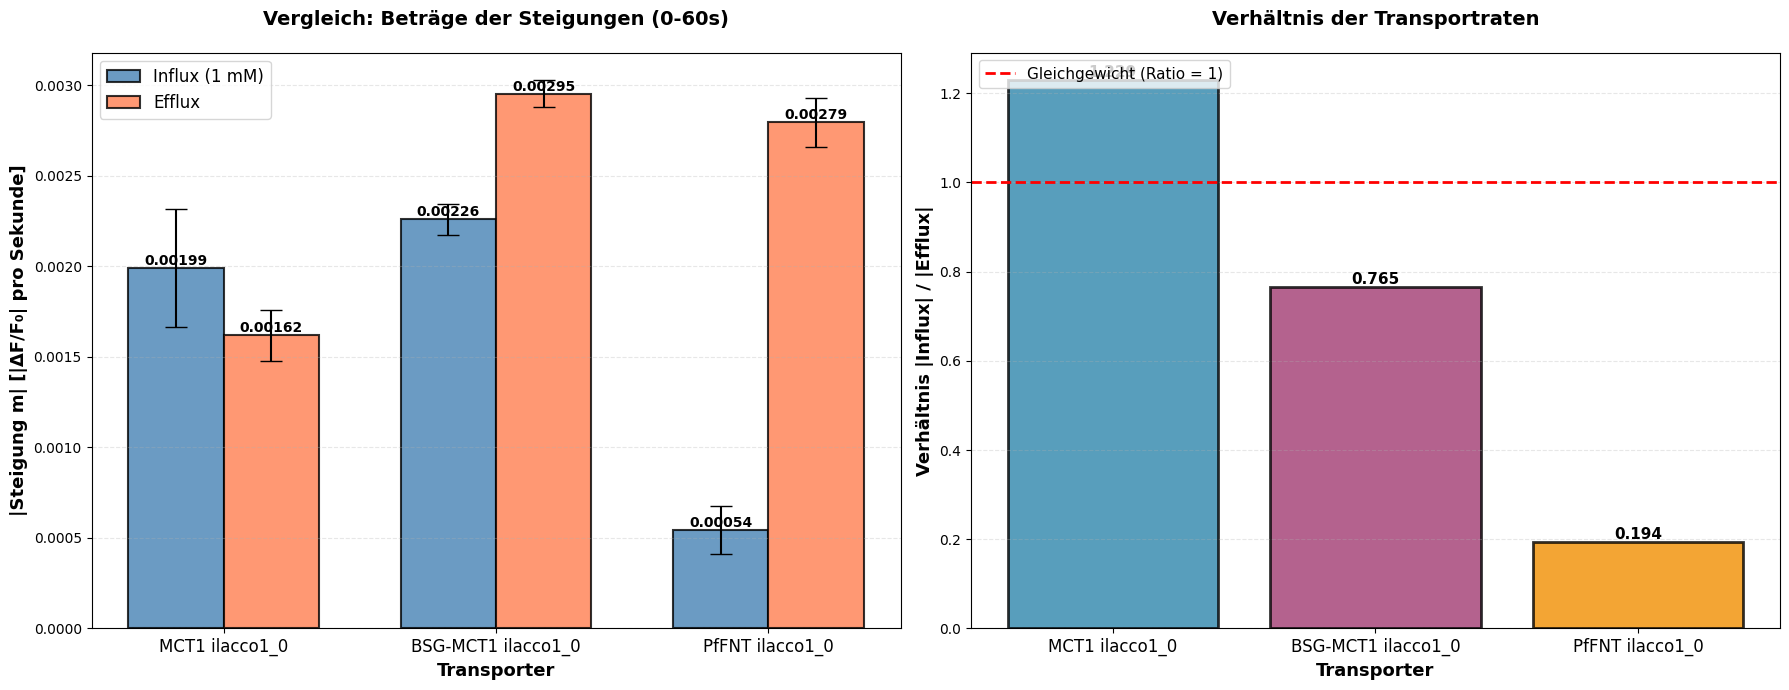


DETAILLIERTE ZUSAMMENFASSUNG: Vergleich der Beträge (0-60 Sekunden)

MCT1 ilacco1_0:
  Influx (1 mM):  m = +0.001989 ± 0.000325
                  |m| = 0.001989
  Efflux:         m = -0.001618 ± 0.000139
                  |m| = 0.001618

  Verhältnis |Influx|/|Efflux|: 1.229
  → Influx ist 22.9% schneller als Efflux
  Differenz |Influx| - |Efflux|: +0.000371

BSG-MCT1 ilacco1_0:
  Influx (1 mM):  m = +0.002258 ± 0.000085
                  |m| = 0.002258
  Efflux:         m = -0.002952 ± 0.000075
                  |m| = 0.002952

  Verhältnis |Influx|/|Efflux|: 0.765
  → Efflux ist 23.5% schneller als Influx
  Differenz |Influx| - |Efflux|: -0.000694

PfFNT ilacco1_0:
  Influx (1 mM):  m = +0.000541 ± 0.000133
                  |m| = 0.000541
  Efflux:         m = -0.002794 ± 0.000134
                  |m| = 0.002794

  Verhältnis |Influx|/|Efflux|: 0.194
  → Efflux ist 80.6% schneller als Influx
  Differenz |Influx| - |Efflux|: -0.002252


RANKING nach Transportrate (Betrag):
--------

In [11]:
# Vergleich der BETRÄGE der Steigungen (absolute Werte)
# Dies ermöglicht einen direkten Vergleich der Transportraten

import numpy as np
import matplotlib.pyplot as plt

# Erstelle Vergleichs-Histogramm mit absoluten Werten
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

transporter_names = [r['name'] for r in results]
x = np.arange(len(transporter_names))
width = 0.35

# Absolute Werte (Beträge) der Steigungen
influx_slopes_abs = [abs(r['m_influx']) for r in results]
influx_errors = [r['m_influx_err'] for r in results]
efflux_slopes_abs = [abs(r['m_efflux']) for r in results]
efflux_errors = [r['m_efflux_err'] for r in results]

# Plot 1: Absolute Werte
bars1 = ax1.bar(x - width/2, influx_slopes_abs, width, yerr=influx_errors,
                label='Influx (1 mM)', color='steelblue', edgecolor='black',
                linewidth=1.5, alpha=0.8, capsize=8)

bars2 = ax1.bar(x + width/2, efflux_slopes_abs, width, yerr=efflux_errors,
                label='Efflux', color='coral', edgecolor='black',
                linewidth=1.5, alpha=0.8, capsize=8)

ax1.set_xlabel('Transporter', fontsize=13, fontweight='bold')
ax1.set_ylabel('|Steigung m| [|ΔF/F₀| pro Sekunde]', fontsize=13, fontweight='bold')
ax1.set_title('Vergleich: Beträge der Steigungen (0-60s)', fontsize=14, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(transporter_names, fontsize=12)
ax1.legend(fontsize=12, loc='upper left')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Füge Werte über den Balken hinzu
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.5f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.5f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: Verhältnisse Influx/Efflux
ratios = [abs(r['m_influx']) / abs(r['m_efflux']) if r['m_efflux'] != 0 else 0 for r in results]
colors_ratios = ['#2E86AB', '#A23B72', '#F18F01']

bars_ratio = ax2.bar(x, ratios, color=colors_ratios, edgecolor='black',
                     linewidth=2, alpha=0.8)

ax2.set_xlabel('Transporter', fontsize=13, fontweight='bold')
ax2.set_ylabel('Verhältnis |Influx| / |Efflux|', fontsize=13, fontweight='bold')
ax2.set_title('Verhältnis der Transportraten', fontsize=14, fontweight='bold', pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(transporter_names, fontsize=12)
ax2.axhline(y=1, color='red', linestyle='--', linewidth=2, label='Gleichgewicht (Ratio = 1)')
ax2.legend(fontsize=11, loc='upper left')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Füge Werte über den Balken hinzu
for i, (bar, ratio) in enumerate(zip(bars_ratio, ratios)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{ratio:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('Influx_vs_Efflux_Absolute_Comparison.png', dpi=300, bbox_inches='tight')
print('Saved: Influx_vs_Efflux_Absolute_Comparison.png')
plt.show()

# Erweiterte Zusammenfassung mit absoluten Werten
print('\n' + '='*90)
print('DETAILLIERTE ZUSAMMENFASSUNG: Vergleich der Beträge (0-60 Sekunden)')
print('='*90)

for i, r in enumerate(results):
    print(f'\n{r["name"]}:')
    print(f'  Influx (1 mM):  m = {r["m_influx"]:+.6f} ± {r["m_influx_err"]:.6f}')
    print(f'                  |m| = {abs(r["m_influx"]):.6f}')
    print(f'  Efflux:         m = {r["m_efflux"]:+.6f} ± {r["m_efflux_err"]:.6f}')
    print(f'                  |m| = {abs(r["m_efflux"]):.6f}')
    
    # Verhältnis der Beträge
    ratio = abs(r["m_influx"]) / abs(r["m_efflux"]) if r["m_efflux"] != 0 else np.inf
    print(f'\n  Verhältnis |Influx|/|Efflux|: {ratio:.3f}')
    
    # Interpretation
    if ratio > 1:
        percent_diff = ((ratio - 1) * 100)
        print(f'  → Influx ist {percent_diff:.1f}% schneller als Efflux')
    elif ratio < 1:
        percent_diff = ((1 - ratio) * 100)
        print(f'  → Efflux ist {percent_diff:.1f}% schneller als Influx')
    else:
        print(f'  → Influx und Efflux sind gleich schnell')
    
    # Differenz der Beträge
    diff = abs(r["m_influx"]) - abs(r["m_efflux"])
    print(f'  Differenz |Influx| - |Efflux|: {diff:+.6f}')

print('\n' + '='*90)
print('\nRANKING nach Transportrate (Betrag):')
print('-'*90)

# Ranking für Influx
influx_ranking = sorted(enumerate(results), key=lambda x: abs(x[1]['m_influx']), reverse=True)
print('\nInflux (1 mM) - schnellste zuerst:')
for rank, (idx, r) in enumerate(influx_ranking, 1):
    print(f'  {rank}. {r["name"]:<25} |m| = {abs(r["m_influx"]):.6f}')

# Ranking für Efflux
efflux_ranking = sorted(enumerate(results), key=lambda x: abs(x[1]['m_efflux']), reverse=True)
print('\nEfflux - schnellste zuerst:')
for rank, (idx, r) in enumerate(efflux_ranking, 1):
    print(f'  {rank}. {r["name"]:<25} |m| = {abs(r["m_efflux"]):.6f}')

print('\n' + '='*90)


Saved: Influx_vs_Efflux_Linear_Fits_30s.png


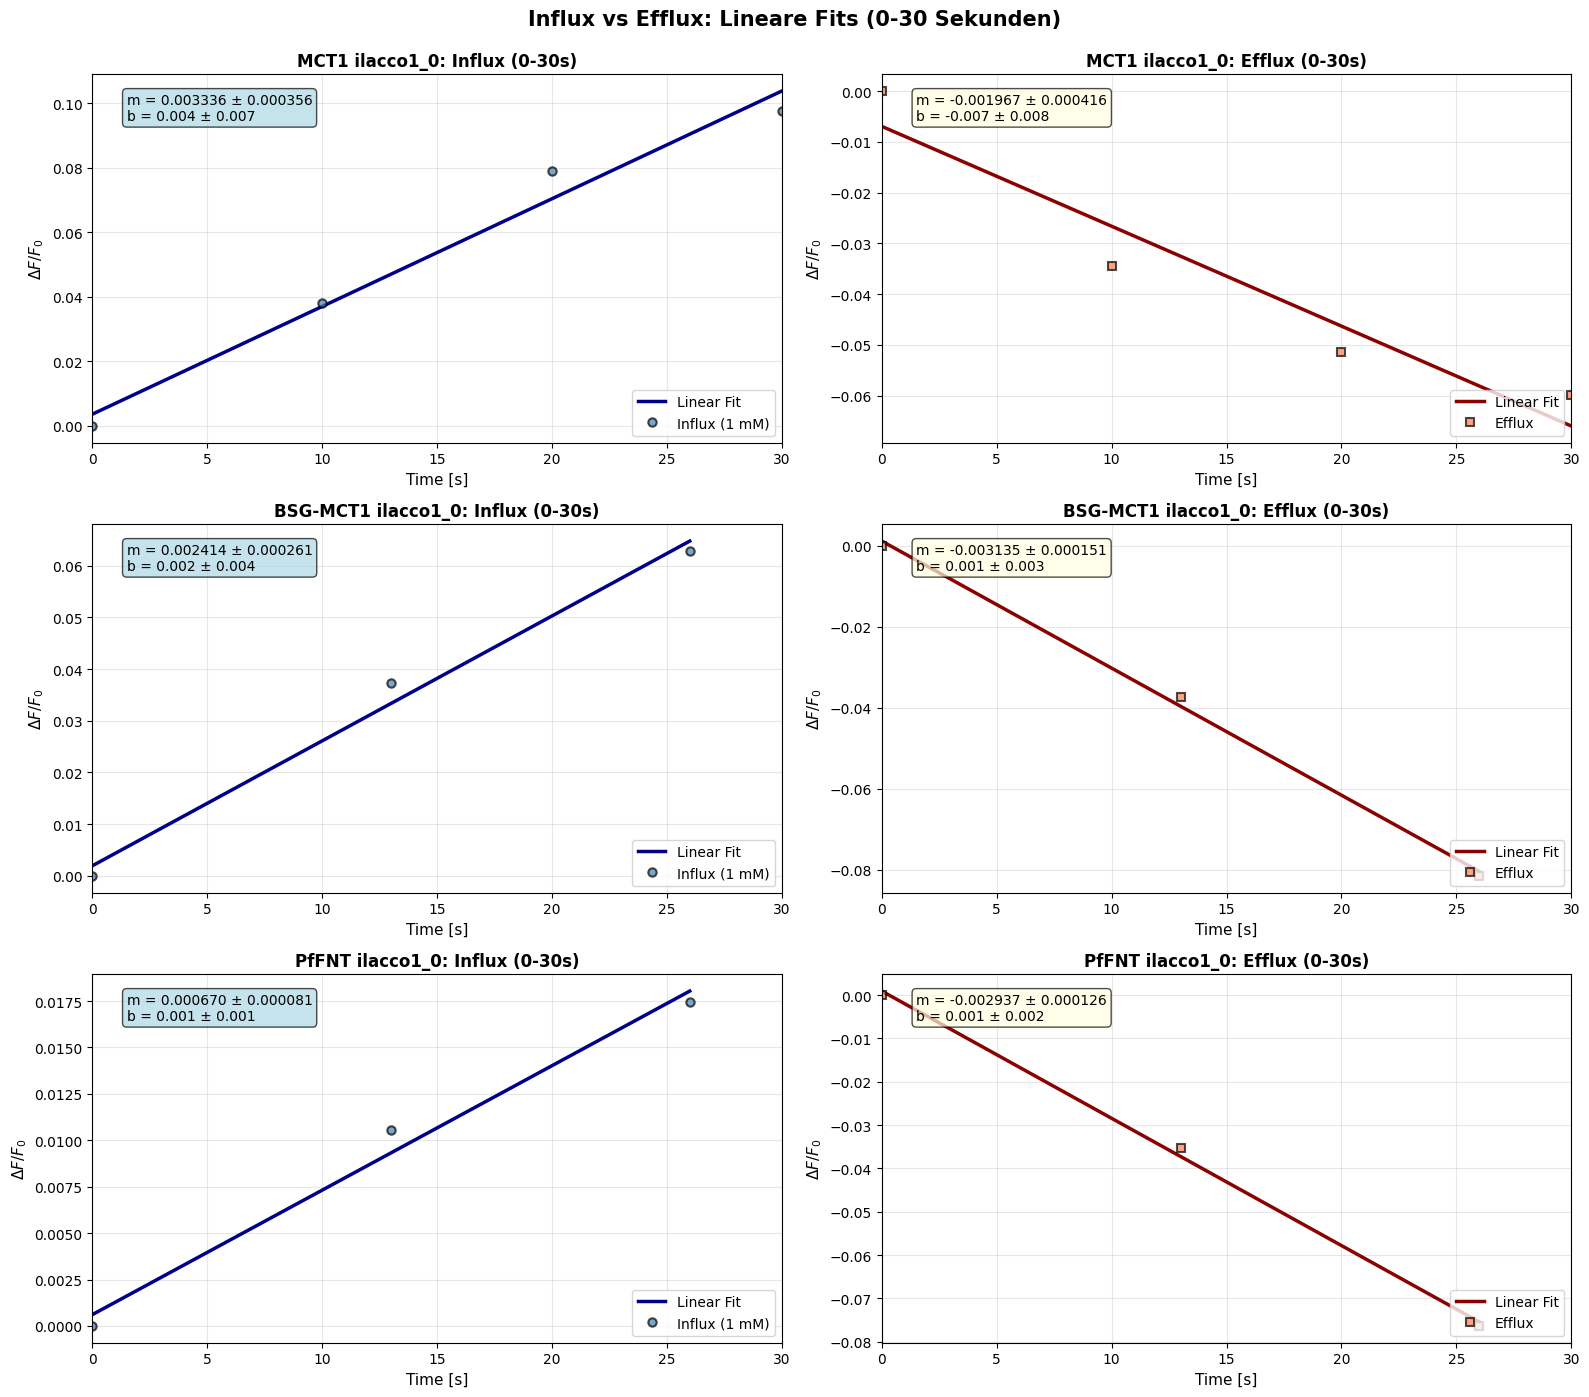

Saved: Influx_vs_Efflux_Absolute_Comparison_30s.png


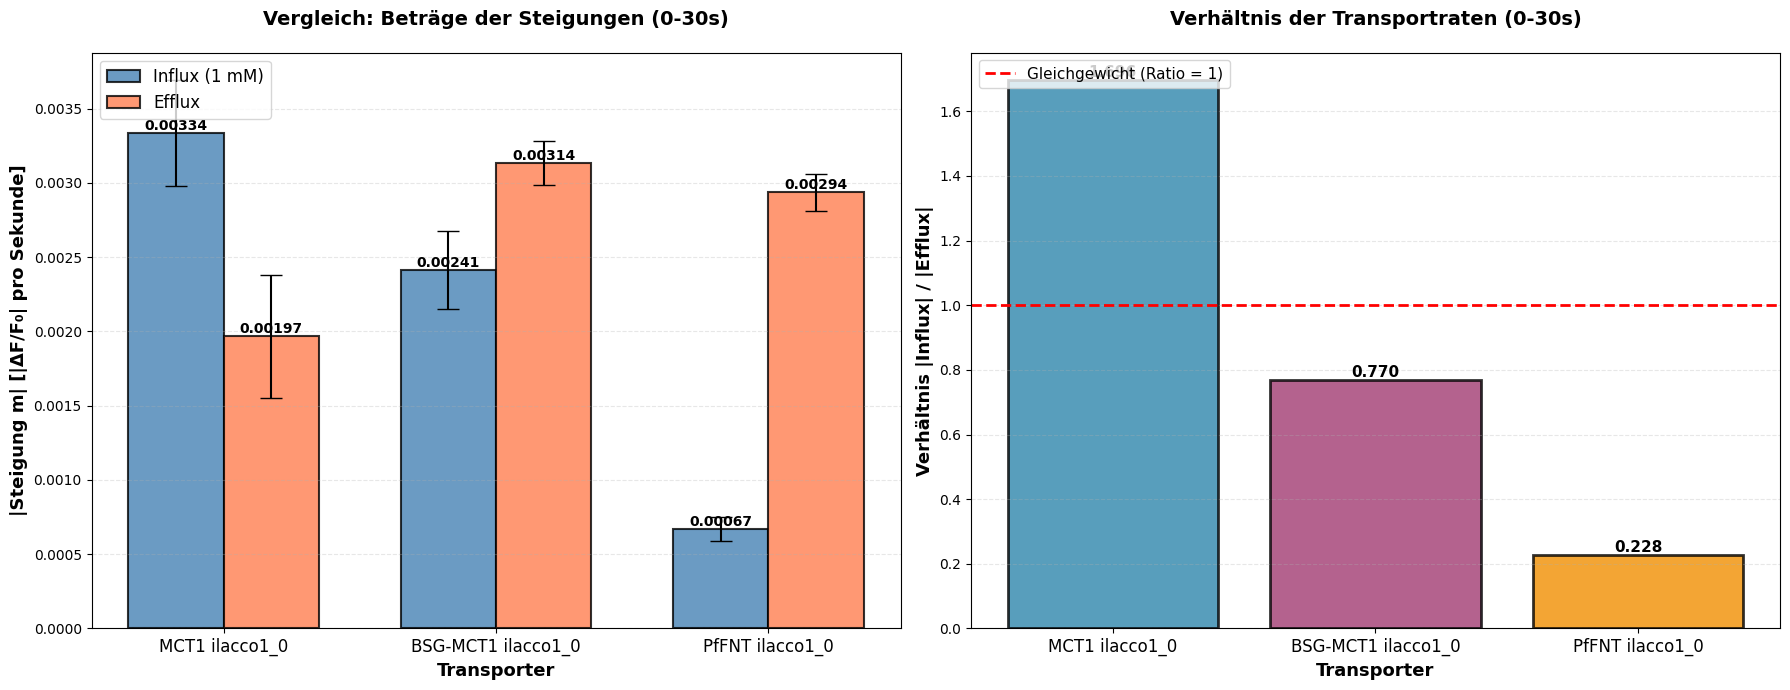


DETAILLIERTE ZUSAMMENFASSUNG: Vergleich der Beträge (0-30 Sekunden)

MCT1 ilacco1_0:
  Influx (1 mM):  m = +0.003336 ± 0.000356
                  |m| = 0.003336
  Efflux:         m = -0.001967 ± 0.000416
                  |m| = 0.001967

  Verhältnis |Influx|/|Efflux|: 1.696
  → Influx ist 69.6% schneller als Efflux
  Differenz |Influx| - |Efflux|: +0.001369

BSG-MCT1 ilacco1_0:
  Influx (1 mM):  m = +0.002414 ± 0.000261
                  |m| = 0.002414
  Efflux:         m = -0.003135 ± 0.000151
                  |m| = 0.003135

  Verhältnis |Influx|/|Efflux|: 0.770
  → Efflux ist 23.0% schneller als Influx
  Differenz |Influx| - |Efflux|: -0.000721

PfFNT ilacco1_0:
  Influx (1 mM):  m = +0.000670 ± 0.000081
                  |m| = 0.000670
  Efflux:         m = -0.002937 ± 0.000126
                  |m| = 0.002937

  Verhältnis |Influx|/|Efflux|: 0.228
  → Efflux ist 77.2% schneller als Influx
  Differenz |Influx| - |Efflux|: -0.002267


RANKING nach Transportrate (Betrag, 0-30s):
-

In [12]:
# Linearer Fit in den ersten 30 Sekunden: Influx vs Efflux
# Vergleich der Beträge der Steigungen für MCT1, BSG-MCT1, PfFNT

import numpy as np
import matplotlib.pyplot as plt

# Ergebnisse für 30 Sekunden sammeln
results_30s = []

# Erstelle 3x2 Subplot-Grid für individuelle Fits (30s)
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

for row, (name, influx_data, efflux_data) in enumerate(datasets):
    # Influx Fit (linke Spalte)
    ax_influx = axes[row, 0]
    
    times_influx = influx_data["Time"].values
    means_influx = influx_data["1 mM Mittelwerte"].values
    stds_influx = influx_data["1 mM Standardabweichung"].values
    
    m_influx, m_err_influx, b_influx, b_err_influx, t_clean_influx, y_clean_influx = linear_fit_60s(
        times_influx, means_influx, 30  # 30 Sekunden!
    )
    
    # Plot Influx Daten
    ax_influx.errorbar(t_clean_influx, y_clean_influx, 
                      marker='o', linestyle='', capsize=4,
                      markerfacecolor='steelblue', markeredgecolor='black',
                      markeredgewidth=1.5, markersize=6,
                      label='Influx (1 mM)', alpha=0.7, color='steelblue')
    
    # Plot Influx Fit
    t_fit = np.linspace(t_clean_influx.min(), t_clean_influx.max(), 200)
    y_fit = m_influx * t_fit + b_influx
    ax_influx.plot(t_fit, y_fit, '-', linewidth=2.5, color='darkblue', label='Linear Fit')
    
    # Textbox mit Parametern
    textstr = f'm = {m_influx:.6f} ± {m_err_influx:.6f}\nb = {b_influx:.3f} ± {b_err_influx:.3f}'
    ax_influx.text(0.05, 0.95, textstr, transform=ax_influx.transAxes,
                  fontsize=10, verticalalignment='top',
                  bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    
    ax_influx.set_title(f'{name}: Influx (0-30s)', fontsize=12, fontweight='bold')
    ax_influx.set_xlabel('Time [s]', fontsize=11)
    ax_influx.set_ylabel(r'$\Delta F/F_0$', fontsize=11)
    ax_influx.grid(alpha=0.3)
    ax_influx.legend(loc='lower right', fontsize=10)
    ax_influx.set_xlim(0, 30)
    
    # Efflux Fit (rechte Spalte)
    ax_efflux = axes[row, 1]
    
    times_efflux = efflux_data["Time"].values
    means_efflux = efflux_data["Mittelwerte"].values
    stds_efflux = efflux_data["Standardabweichung"].values
    
    m_efflux, m_err_efflux, b_efflux, b_err_efflux, t_clean_efflux, y_clean_efflux = linear_fit_60s(
        times_efflux, means_efflux, 30  # 30 Sekunden!
    )
    
    # Plot Efflux Daten
    ax_efflux.errorbar(t_clean_efflux, y_clean_efflux,
                      marker='s', linestyle='', capsize=4,
                      markerfacecolor='coral', markeredgecolor='black',
                      markeredgewidth=1.5, markersize=6,
                      label='Efflux', alpha=0.7, color='coral')
    
    # Plot Efflux Fit
    t_fit = np.linspace(t_clean_efflux.min(), t_clean_efflux.max(), 200)
    y_fit = m_efflux * t_fit + b_efflux
    ax_efflux.plot(t_fit, y_fit, '-', linewidth=2.5, color='darkred', label='Linear Fit')
    
    # Textbox mit Parametern
    textstr = f'm = {m_efflux:.6f} ± {m_err_efflux:.6f}\nb = {b_efflux:.3f} ± {b_err_efflux:.3f}'
    ax_efflux.text(0.05, 0.95, textstr, transform=ax_efflux.transAxes,
                  fontsize=10, verticalalignment='top',
                  bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
    
    ax_efflux.set_title(f'{name}: Efflux (0-30s)', fontsize=12, fontweight='bold')
    ax_efflux.set_xlabel('Time [s]', fontsize=11)
    ax_efflux.set_ylabel(r'$\Delta F/F_0$', fontsize=11)
    ax_efflux.grid(alpha=0.3)
    ax_efflux.legend(loc='lower right', fontsize=10)
    ax_efflux.set_xlim(0, 30)
    
    # Speichere Ergebnisse
    results_30s.append({
        'name': name,
        'm_influx': m_influx,
        'm_influx_err': m_err_influx,
        'm_efflux': m_efflux,
        'm_efflux_err': m_err_efflux
    })

plt.suptitle('Influx vs Efflux: Lineare Fits (0-30 Sekunden)', fontsize=15, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('Influx_vs_Efflux_Linear_Fits_30s.png', dpi=300, bbox_inches='tight')
print('Saved: Influx_vs_Efflux_Linear_Fits_30s.png')
plt.show()

# Erstelle Vergleichs-Histogramm mit absoluten Werten (30s)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

transporter_names_30s = [r['name'] for r in results_30s]
x = np.arange(len(transporter_names_30s))
width = 0.35

# Absolute Werte (Beträge) der Steigungen
influx_slopes_abs_30s = [abs(r['m_influx']) for r in results_30s]
influx_errors_30s = [r['m_influx_err'] for r in results_30s]
efflux_slopes_abs_30s = [abs(r['m_efflux']) for r in results_30s]
efflux_errors_30s = [r['m_efflux_err'] for r in results_30s]

# Plot 1: Absolute Werte
bars1 = ax1.bar(x - width/2, influx_slopes_abs_30s, width, yerr=influx_errors_30s,
                label='Influx (1 mM)', color='steelblue', edgecolor='black',
                linewidth=1.5, alpha=0.8, capsize=8)

bars2 = ax1.bar(x + width/2, efflux_slopes_abs_30s, width, yerr=efflux_errors_30s,
                label='Efflux', color='coral', edgecolor='black',
                linewidth=1.5, alpha=0.8, capsize=8)

ax1.set_xlabel('Transporter', fontsize=13, fontweight='bold')
ax1.set_ylabel('|Steigung m| [|ΔF/F₀| pro Sekunde]', fontsize=13, fontweight='bold')
ax1.set_title('Vergleich: Beträge der Steigungen (0-30s)', fontsize=14, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels(transporter_names_30s, fontsize=12)
ax1.legend(fontsize=12, loc='upper left')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Füge Werte über den Balken hinzu
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.5f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.5f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: Verhältnisse Influx/Efflux
ratios_30s = [abs(r['m_influx']) / abs(r['m_efflux']) if r['m_efflux'] != 0 else 0 for r in results_30s]
colors_ratios = ['#2E86AB', '#A23B72', '#F18F01']

bars_ratio = ax2.bar(x, ratios_30s, color=colors_ratios, edgecolor='black',
                     linewidth=2, alpha=0.8)

ax2.set_xlabel('Transporter', fontsize=13, fontweight='bold')
ax2.set_ylabel('Verhältnis |Influx| / |Efflux|', fontsize=13, fontweight='bold')
ax2.set_title('Verhältnis der Transportraten (0-30s)', fontsize=14, fontweight='bold', pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(transporter_names_30s, fontsize=12)
ax2.axhline(y=1, color='red', linestyle='--', linewidth=2, label='Gleichgewicht (Ratio = 1)')
ax2.legend(fontsize=11, loc='upper left')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Füge Werte über den Balken hinzu
for i, (bar, ratio) in enumerate(zip(bars_ratio, ratios_30s)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{ratio:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('Influx_vs_Efflux_Absolute_Comparison_30s.png', dpi=300, bbox_inches='tight')
print('Saved: Influx_vs_Efflux_Absolute_Comparison_30s.png')
plt.show()

# Erweiterte Zusammenfassung mit absoluten Werten (30s)
print('\n' + '='*90)
print('DETAILLIERTE ZUSAMMENFASSUNG: Vergleich der Beträge (0-30 Sekunden)')
print('='*90)

for i, r in enumerate(results_30s):
    print(f'\n{r["name"]}:')
    print(f'  Influx (1 mM):  m = {r["m_influx"]:+.6f} ± {r["m_influx_err"]:.6f}')
    print(f'                  |m| = {abs(r["m_influx"]):.6f}')
    print(f'  Efflux:         m = {r["m_efflux"]:+.6f} ± {r["m_efflux_err"]:.6f}')
    print(f'                  |m| = {abs(r["m_efflux"]):.6f}')
    
    # Verhältnis der Beträge
    ratio = abs(r["m_influx"]) / abs(r["m_efflux"]) if r["m_efflux"] != 0 else np.inf
    print(f'\n  Verhältnis |Influx|/|Efflux|: {ratio:.3f}')
    
    # Interpretation
    if ratio > 1:
        percent_diff = ((ratio - 1) * 100)
        print(f'  → Influx ist {percent_diff:.1f}% schneller als Efflux')
    elif ratio < 1:
        percent_diff = ((1 - ratio) * 100)
        print(f'  → Efflux ist {percent_diff:.1f}% schneller als Influx')
    else:
        print(f'  → Influx und Efflux sind gleich schnell')
    
    # Differenz der Beträge
    diff = abs(r["m_influx"]) - abs(r["m_efflux"])
    print(f'  Differenz |Influx| - |Efflux|: {diff:+.6f}')

print('\n' + '='*90)
print('\nRANKING nach Transportrate (Betrag, 0-30s):')
print('-'*90)

# Ranking für Influx
influx_ranking_30s = sorted(enumerate(results_30s), key=lambda x: abs(x[1]['m_influx']), reverse=True)
print('\nInflux (1 mM) - schnellste zuerst:')
for rank, (idx, r) in enumerate(influx_ranking_30s, 1):
    print(f'  {rank}. {r["name"]:<25} |m| = {abs(r["m_influx"]):.6f}')

# Ranking für Efflux
efflux_ranking_30s = sorted(enumerate(results_30s), key=lambda x: abs(x[1]['m_efflux']), reverse=True)
print('\nEfflux - schnellste zuerst:')
for rank, (idx, r) in enumerate(efflux_ranking_30s, 1):
    print(f'  {rank}. {r["name"]:<25} |m| = {abs(r["m_efflux"]):.6f}')

print('\n' + '='*90)


TEIL 1: Plots über den gesamten Messzeitraum (ohne Fit)

Saved: MCT1_Influx_vs_Efflux_Full.png
Saved: MCT1_Influx_vs_Efflux_Full.png


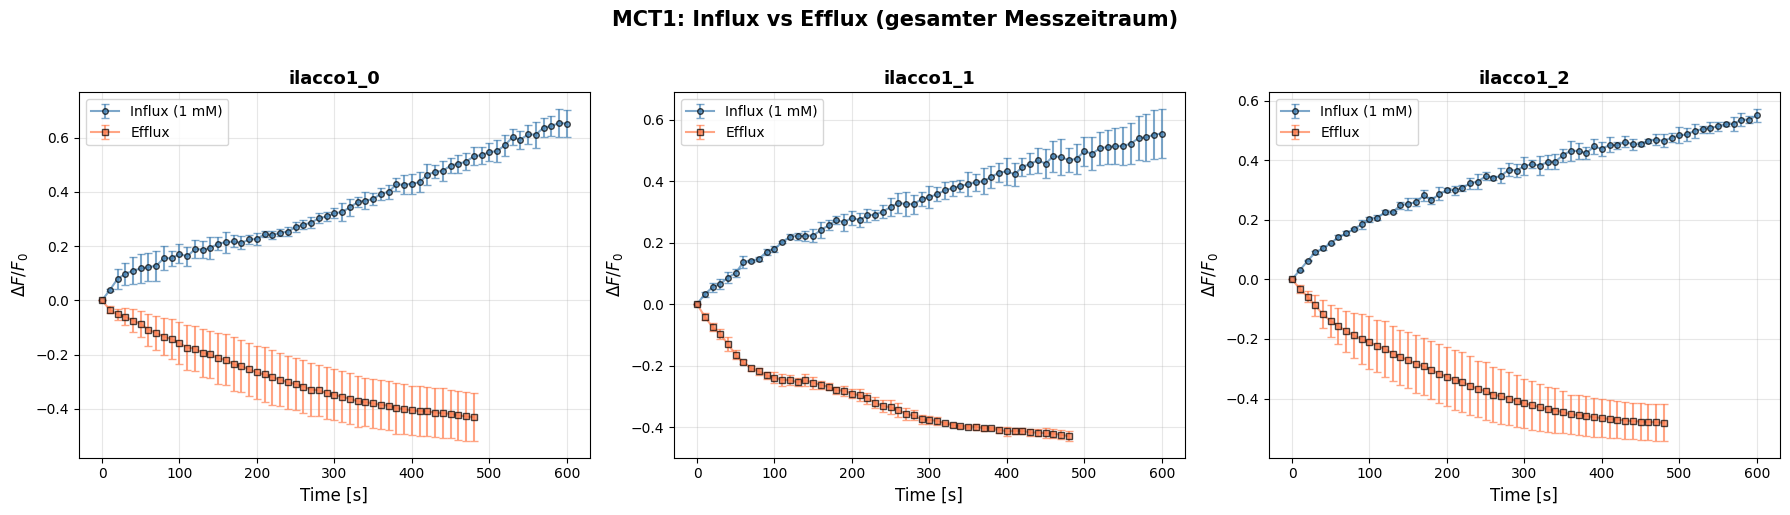

Saved: BSG_MCT1_Influx_vs_Efflux_Full.png


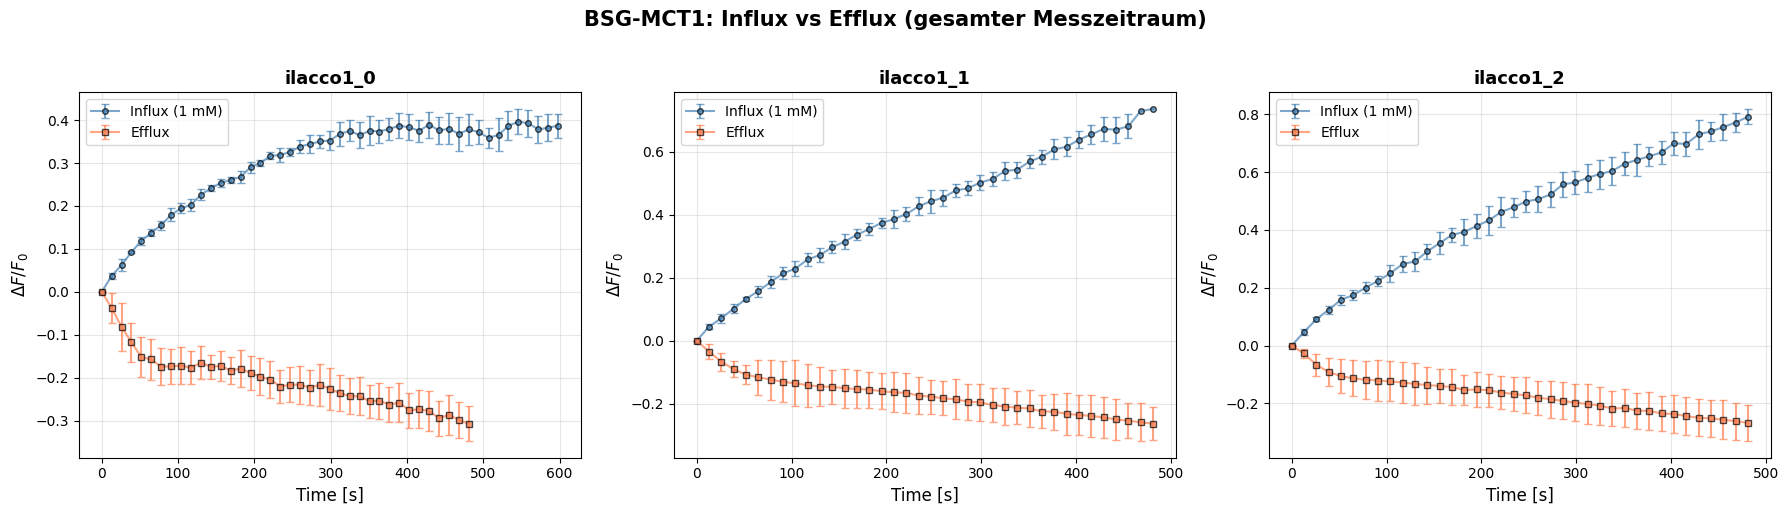

Saved: PfFNT_Influx_vs_Efflux_Full.png


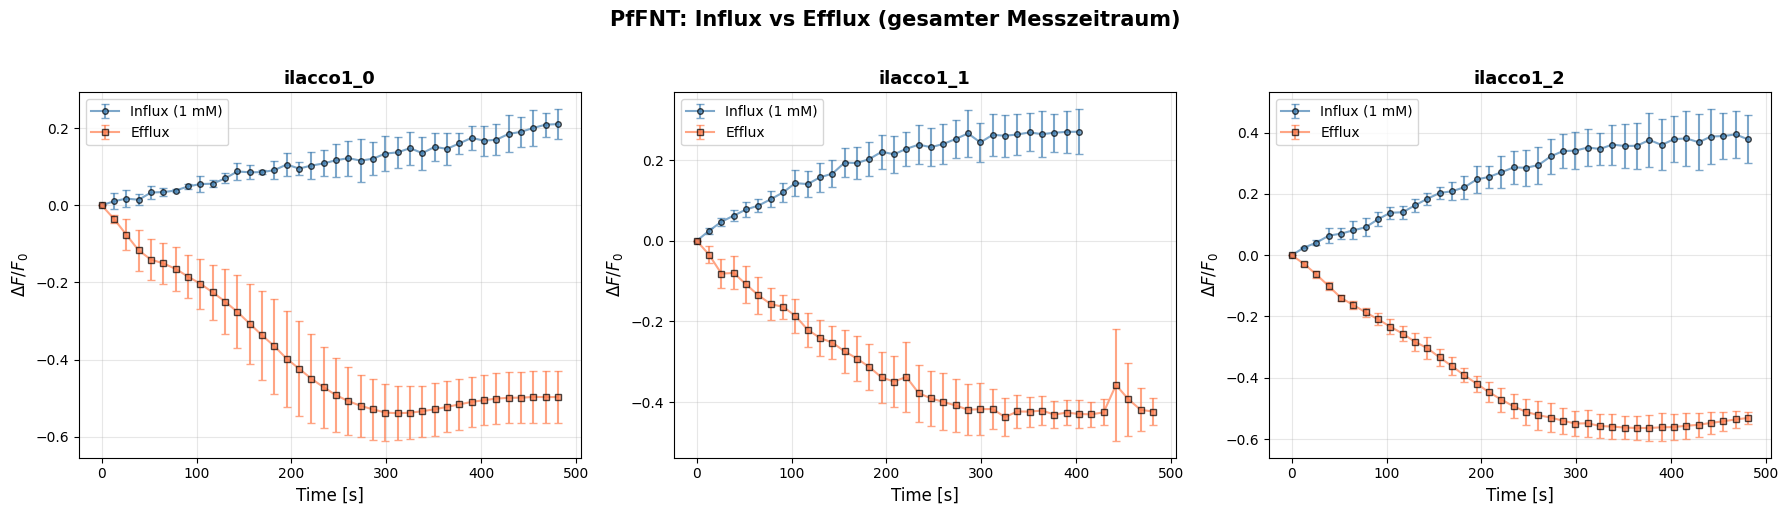


TEIL 2: Plots mit linearem Fit (0-40s)

Saved: MCT1_Influx_vs_Efflux_40s.png
Saved: MCT1_Influx_vs_Efflux_40s.png


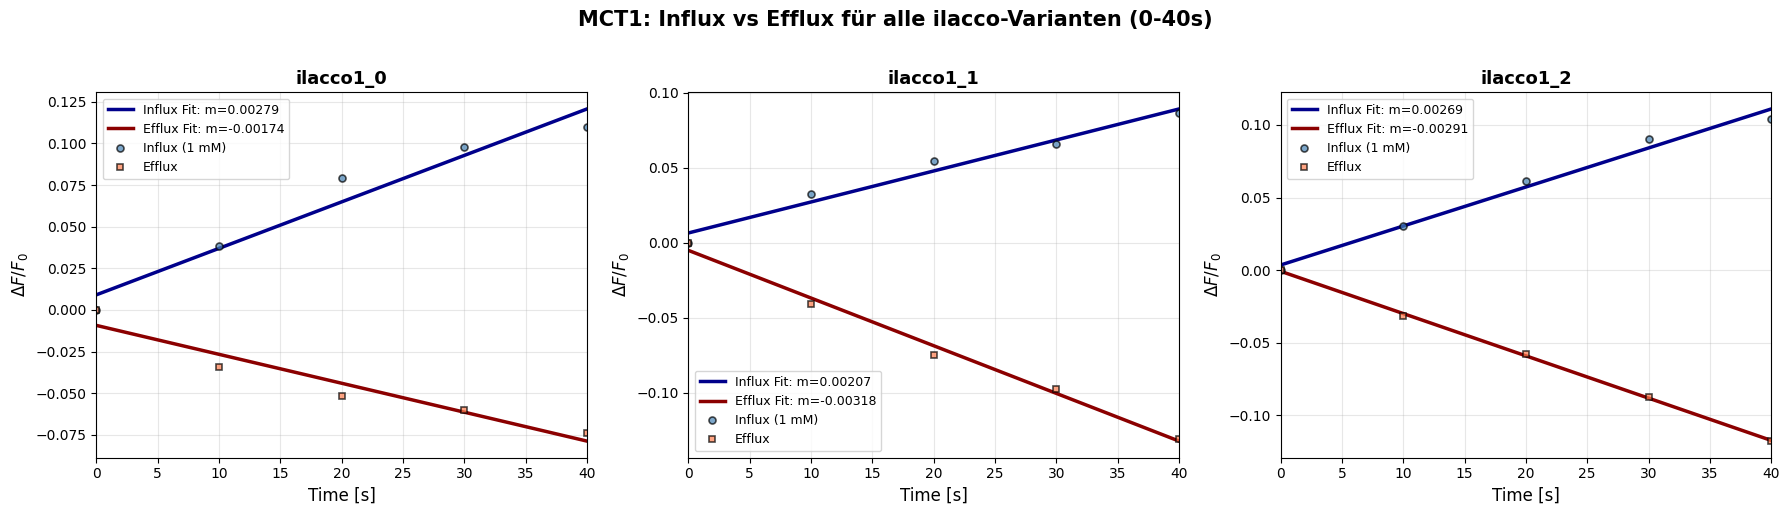

Saved: BSG_MCT1_Influx_vs_Efflux_40s.png


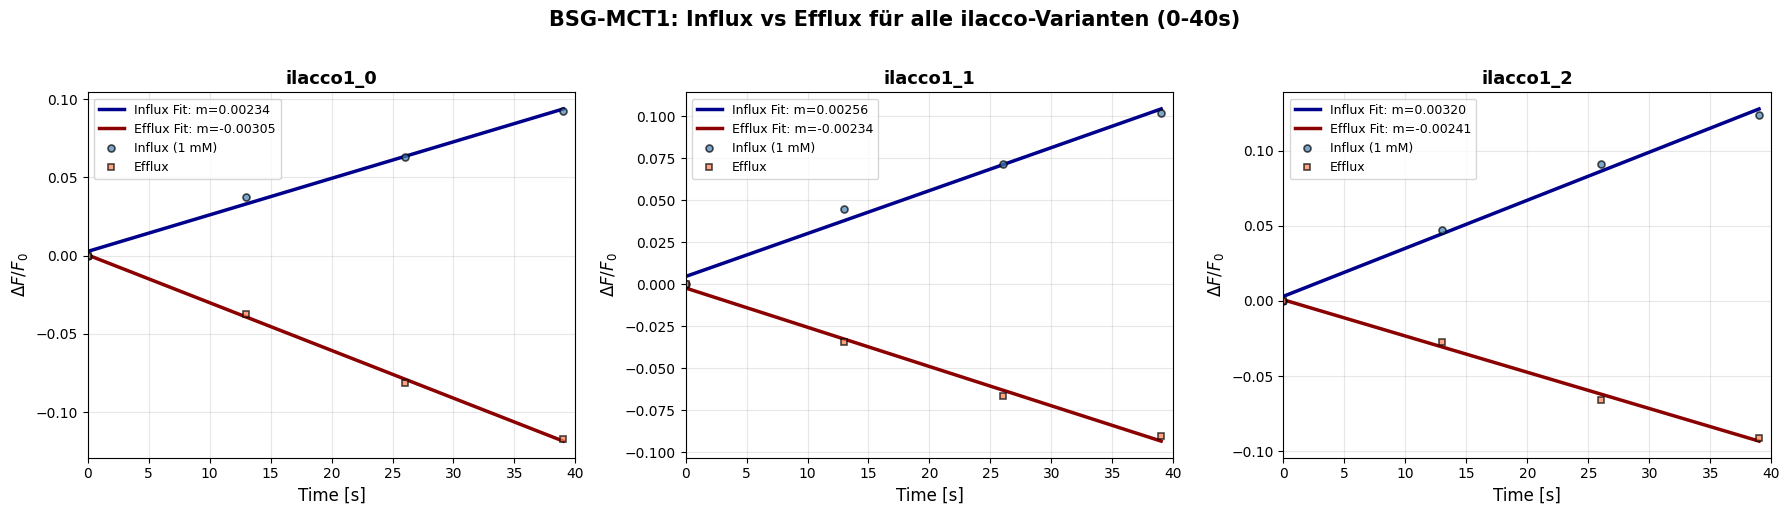

Saved: PfFNT_Influx_vs_Efflux_40s.png


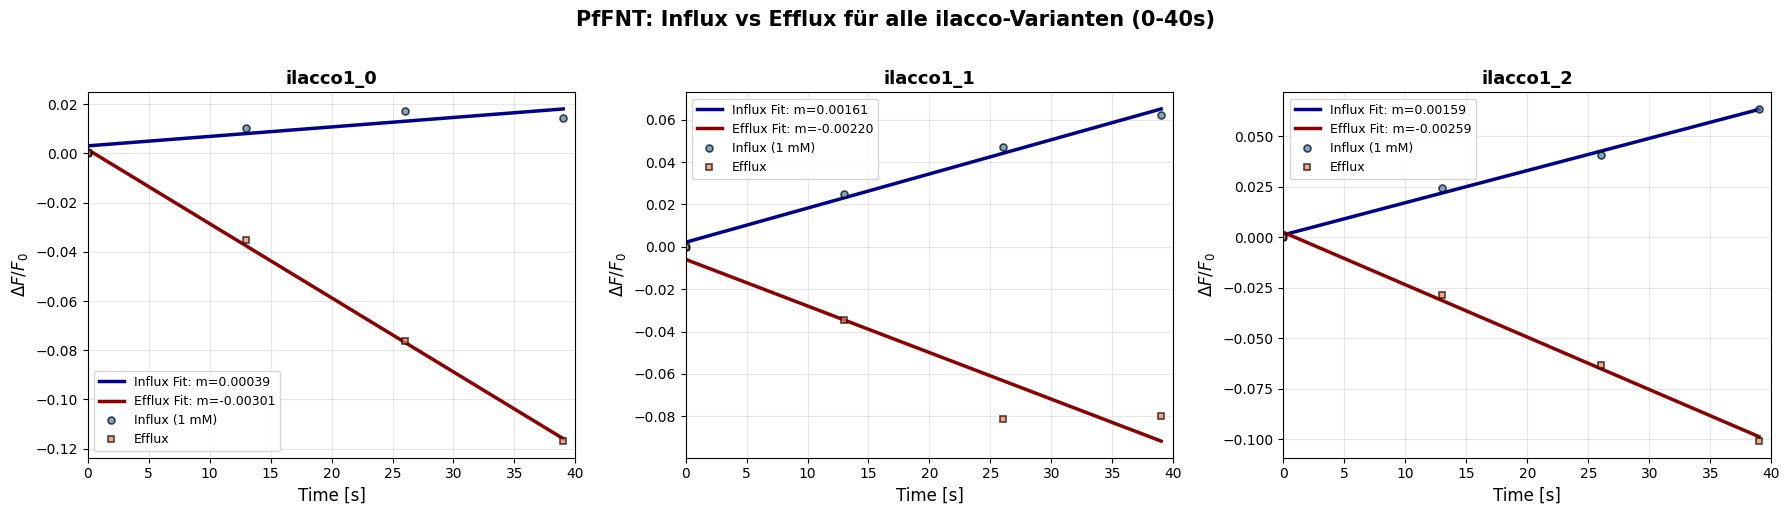

Saved: MCT1_Slopes_Comparison_40s.png


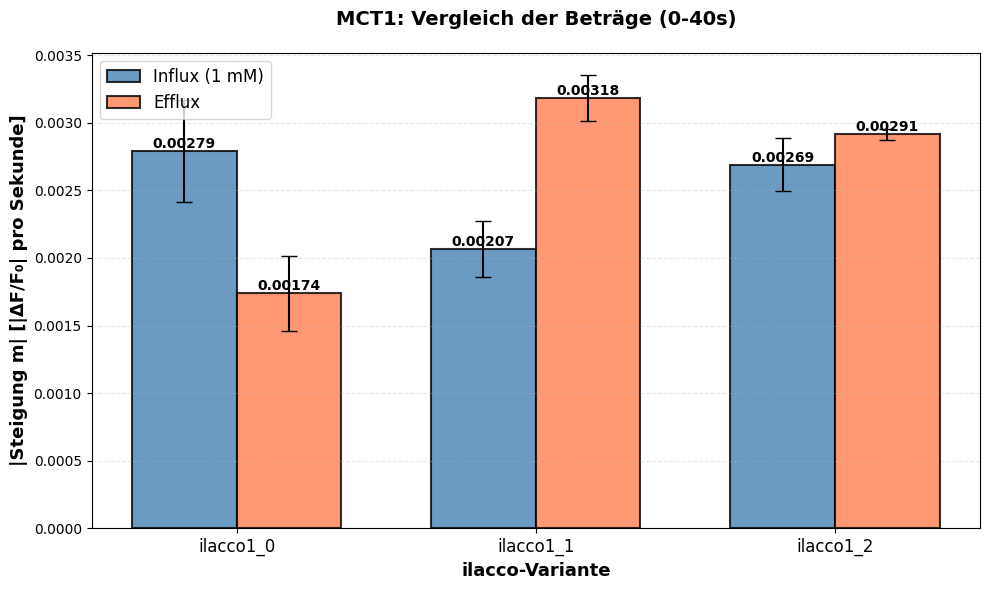

Saved: BSG_MCT1_Slopes_Comparison_40s.png


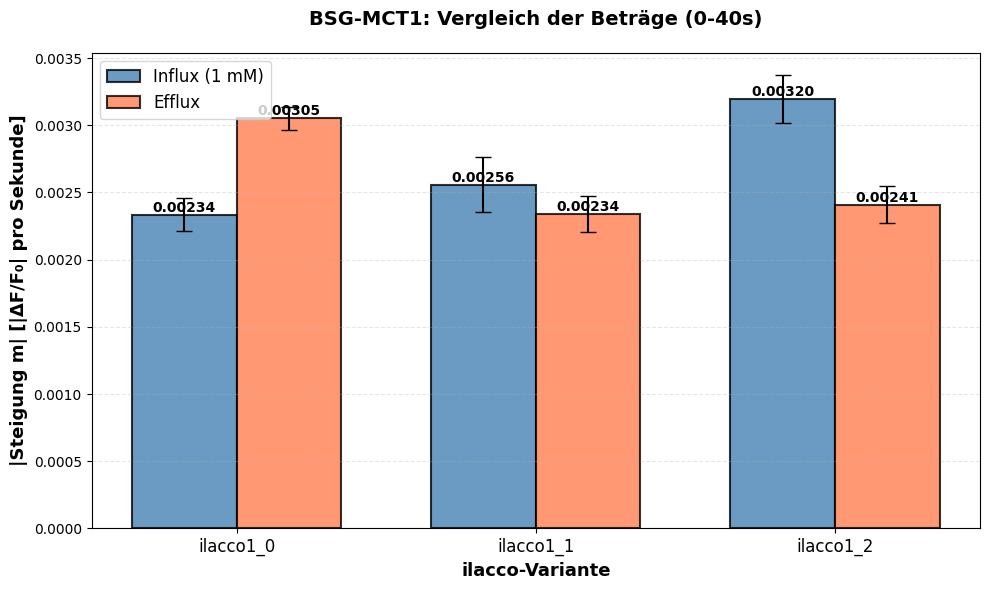

Saved: PfFNT_Slopes_Comparison_40s.png


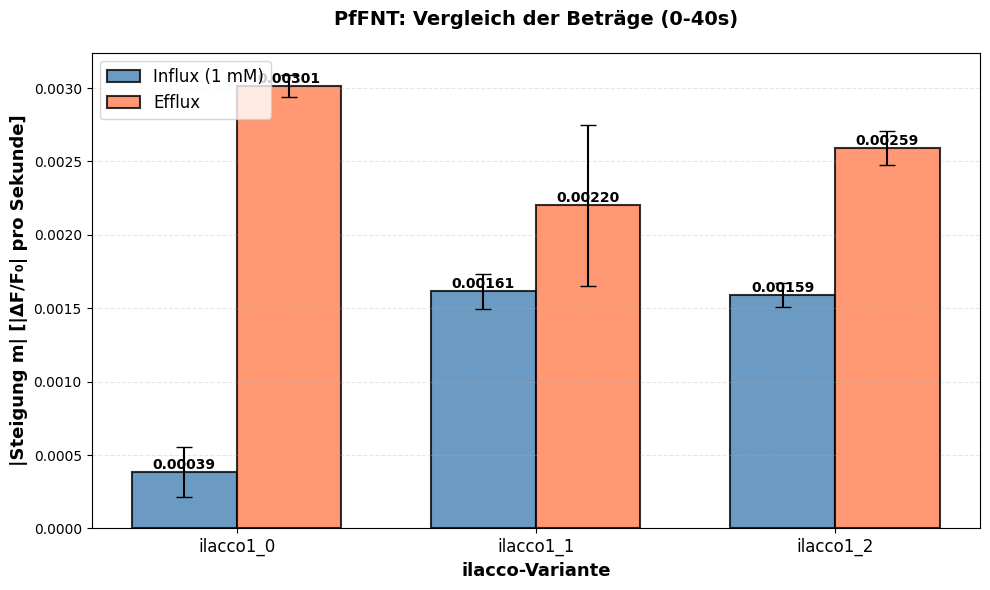


ZUSAMMENFASSUNG: Alle Transporter und ilacco-Varianten (0-40 Sekunden)

MCT1:
----------------------------------------------------------------------------------------------------

  ilacco1_0:
    Influx (1 mM):  m = +0.002790 ± 0.000376  |m| = 0.002790
    Efflux:         m = -0.001737 ± 0.000275  |m| = 0.001737
    Verhältnis |Influx|/|Efflux|: 1.606 → Influx 60.6% schneller

  ilacco1_1:
    Influx (1 mM):  m = +0.002067 ± 0.000209  |m| = 0.002067
    Efflux:         m = -0.003179 ± 0.000170  |m| = 0.003179
    Verhältnis |Influx|/|Efflux|: 0.650 → Efflux 35.0% schneller

  ilacco1_2:
    Influx (1 mM):  m = +0.002688 ± 0.000196  |m| = 0.002688
    Efflux:         m = -0.002913 ± 0.000043  |m| = 0.002913
    Verhältnis |Influx|/|Efflux|: 0.923 → Efflux 7.7% schneller

BSG-MCT1:
----------------------------------------------------------------------------------------------------

  ilacco1_0:
    Influx (1 mM):  m = +0.002336 ± 0.000125  |m| = 0.002336
    Efflux:         m = -0.0030

In [15]:
# Vergleich aller ilacco-Varianten: Influx vs Efflux (0-40s)
# Separate Abbildungen für jeden Transporter mit 3 Subplots (ilacco-Varianten)

import numpy as np
import matplotlib.pyplot as plt

# Datensätze nach Transporter gruppiert
transporter_datasets = {
    'MCT1': [
        ('ilacco1_0', I_MCT1_ilacco1_0, E_MCT1_ilacco1_0),
        ('ilacco1_1', I_MCT1_ilacco1_1, E_MCT1_ilacco1_1),
        ('ilacco1_2', I_MCT1_ilacco1_2, E_MCT1_ilacco1_2),
    ],
    'BSG-MCT1': [
        ('ilacco1_0', I_BSG_MCT1_ilacco1_0, E_BSG_MCT1_ilacco1_0),
        ('ilacco1_1', I_BSG_MCT1_ilacco1_1, E_BSG_MCT1_ilacco1_1),
        ('ilacco1_2', I_BSG_MCT1_ilacco1_2, E_BSG_MCT1_ilacco1_2),
    ],
    'PfFNT': [
        ('ilacco1_0', I_PfFNT_ilacco1_0, E_PfFNT_ilacco1_0),
        ('ilacco1_1', I_PfFNT_ilacco1_1, E_PfFNT_ilacco1_1),
        ('ilacco1_2', I_PfFNT_ilacco1_2, E_PfFNT_ilacco1_2),
    ]
}

# Ergebnisse sammeln
results_by_transporter = {}

# TEIL 1: Plots über den gesamten Messzeitraum (ohne Fit)
print("="*80)
print("TEIL 1: Plots über den gesamten Messzeitraum (ohne Fit)")
print("="*80 + "\n")

for transporter_name, datasets in transporter_datasets.items():
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for idx, (variant_name, influx_data, efflux_data) in enumerate(datasets):
        ax = axes[idx]
        
        # Influx Daten - gesamter Zeitraum
        times_influx = influx_data["Time"].values
        means_influx = influx_data["1 mM Mittelwerte"].values
        stds_influx = influx_data["1 mM Standardabweichung"].values
        
        # Efflux Daten - gesamter Zeitraum
        times_efflux = efflux_data["Time"].values
        means_efflux = efflux_data["Mittelwerte"].values
        stds_efflux = efflux_data["Standardabweichung"].values
        
        # Entferne NaN-Werte
        mask_influx = ~(np.isnan(times_influx) | np.isnan(means_influx))
        mask_efflux = ~(np.isnan(times_efflux) | np.isnan(means_efflux))
        
        # Plot Influx - vollständiger Zeitraum
        ax.errorbar(times_influx[mask_influx], means_influx[mask_influx], 
                    yerr=stds_influx[mask_influx],
                    marker='o', linestyle='-', capsize=3, markersize=4,
                    markerfacecolor='steelblue', markeredgecolor='black',
                    markeredgewidth=1, alpha=0.7, color='steelblue',
                    linewidth=1.5, label='Influx (1 mM)')
        
        # Plot Efflux - vollständiger Zeitraum
        ax.errorbar(times_efflux[mask_efflux], means_efflux[mask_efflux],
                    yerr=stds_efflux[mask_efflux],
                    marker='s', linestyle='-', capsize=3, markersize=4,
                    markerfacecolor='coral', markeredgecolor='black',
                    markeredgewidth=1, alpha=0.7, color='coral',
                    linewidth=1.5, label='Efflux')
        
        # Formatierung
        ax.set_title(f'{variant_name}', fontsize=13, fontweight='bold')
        ax.set_xlabel('Time [s]', fontsize=12)
        ax.set_ylabel(r'$\Delta F/F_0$', fontsize=12)
        ax.grid(alpha=0.3)
        ax.legend(fontsize=10, loc='best')
    
    plt.suptitle(f'{transporter_name}: Influx vs Efflux (gesamter Messzeitraum)', 
                 fontsize=15, fontweight='bold', y=1.02)
    plt.tight_layout()
    filename = f'{transporter_name.replace("-", "_")}_Influx_vs_Efflux_Full.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f'Saved: {filename}')
    plt.show()

print("\n" + "="*80)
print("TEIL 2: Plots mit linearem Fit (0-40s)")
print("="*80 + "\n")

# Erstelle für jeden Transporter eine separate Abbildung mit 3 Subplots
for transporter_name, datasets in transporter_datasets.items():
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    results_by_transporter[transporter_name] = []
    
    for idx, (variant_name, influx_data, efflux_data) in enumerate(datasets):
        ax = axes[idx]
        
        # Influx Daten
        times_influx = influx_data["Time"].values
        means_influx = influx_data["1 mM Mittelwerte"].values
        stds_influx = influx_data["1 mM Standardabweichung"].values
        
        # Efflux Daten
        times_efflux = efflux_data["Time"].values
        means_efflux = efflux_data["Mittelwerte"].values
        stds_efflux = efflux_data["Standardabweichung"].values
        
        # Fits für 40 Sekunden
        m_influx, m_err_influx, b_influx, b_err_influx, t_clean_influx, y_clean_influx = linear_fit_60s(
            times_influx, means_influx, 40
        )
        
        m_efflux, m_err_efflux, b_efflux, b_err_efflux, t_clean_efflux, y_clean_efflux = linear_fit_60s(
            times_efflux, means_efflux, 40
        )
        
        # Plot Influx mit vollständiger Kurve
        ax.errorbar(t_clean_influx, y_clean_influx, 
                    marker='o', linestyle='', capsize=3, markersize=5,
                    markerfacecolor='steelblue', markeredgecolor='black',
                    markeredgewidth=1.2, alpha=0.7, color='steelblue',
                    label='Influx (1 mM)')
        
        # Influx Fit
        t_fit_influx = np.linspace(t_clean_influx.min(), t_clean_influx.max(), 100)
        y_fit_influx = m_influx * t_fit_influx + b_influx
        ax.plot(t_fit_influx, y_fit_influx, '-', linewidth=2.5, color='darkblue',
                label=f'Influx Fit: m={m_influx:.5f}')
        
        # Plot Efflux mit vollständiger Kurve
        ax.errorbar(t_clean_efflux, y_clean_efflux,
                    marker='s', linestyle='', capsize=3, markersize=5,
                    markerfacecolor='coral', markeredgecolor='black',
                    markeredgewidth=1.2, alpha=0.7, color='coral',
                    label='Efflux')
        
        # Efflux Fit
        t_fit_efflux = np.linspace(t_clean_efflux.min(), t_clean_efflux.max(), 100)
        y_fit_efflux = m_efflux * t_fit_efflux + b_efflux
        ax.plot(t_fit_efflux, y_fit_efflux, '-', linewidth=2.5, color='darkred',
                label=f'Efflux Fit: m={m_efflux:.5f}')
        
        # Formatierung
        ax.set_title(f'{variant_name}', fontsize=13, fontweight='bold')
        ax.set_xlabel('Time [s]', fontsize=12)
        ax.set_ylabel(r'$\Delta F/F_0$', fontsize=12)
        ax.grid(alpha=0.3)
        ax.legend(fontsize=9, loc='best')
        ax.set_xlim(0, 40)
        
        # Speichere Ergebnisse
        results_by_transporter[transporter_name].append({
            'variant': variant_name,
            'm_influx': m_influx,
            'm_influx_err': m_err_influx,
            'm_efflux': m_efflux,
            'm_efflux_err': m_err_efflux
        })
    
    plt.suptitle(f'{transporter_name}: Influx vs Efflux für alle ilacco-Varianten (0-40s)', 
                 fontsize=15, fontweight='bold', y=1.02)
    plt.tight_layout()
    filename = f'{transporter_name.replace("-", "_")}_Influx_vs_Efflux_40s.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f'Saved: {filename}')
    plt.show()

# Erstelle separate Histogramme für jeden Transporter
for transporter_name, results in results_by_transporter.items():
    fig, ax = plt.subplots(figsize=(10, 6))
    
    variants = [r['variant'] for r in results]
    x = np.arange(len(variants))
    width = 0.35
    
    influx_slopes_abs = [abs(r['m_influx']) for r in results]
    influx_errors = [r['m_influx_err'] for r in results]
    efflux_slopes_abs = [abs(r['m_efflux']) for r in results]
    efflux_errors = [r['m_efflux_err'] for r in results]
    
    bars1 = ax.bar(x - width/2, influx_slopes_abs, width, yerr=influx_errors,
                   label='Influx (1 mM)', color='steelblue', edgecolor='black',
                   linewidth=1.5, alpha=0.8, capsize=6)
    
    bars2 = ax.bar(x + width/2, efflux_slopes_abs, width, yerr=efflux_errors,
                   label='Efflux', color='coral', edgecolor='black',
                   linewidth=1.5, alpha=0.8, capsize=6)
    
    ax.set_xlabel('ilacco-Variante', fontsize=13, fontweight='bold')
    ax.set_ylabel('|Steigung m| [|ΔF/F₀| pro Sekunde]', fontsize=13, fontweight='bold')
    ax.set_title(f'{transporter_name}: Vergleich der Beträge (0-40s)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(variants, fontsize=12)
    ax.legend(fontsize=12, loc='upper left')
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Füge Werte über den Balken hinzu
    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.5f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.5f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    filename = f'{transporter_name.replace("-", "_")}_Slopes_Comparison_40s.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f'Saved: {filename}')
    plt.show()

# Detaillierte Zusammenfassung
print('\n' + '='*100)
print('ZUSAMMENFASSUNG: Alle Transporter und ilacco-Varianten (0-40 Sekunden)')
print('='*100)

for transporter_name, results in results_by_transporter.items():
    print(f'\n{transporter_name}:')
    print('-'*100)
    
    for r in results:
        print(f'\n  {r["variant"]}:')
        print(f'    Influx (1 mM):  m = {r["m_influx"]:+.6f} ± {r["m_influx_err"]:.6f}  |m| = {abs(r["m_influx"]):.6f}')
        print(f'    Efflux:         m = {r["m_efflux"]:+.6f} ± {r["m_efflux_err"]:.6f}  |m| = {abs(r["m_efflux"]):.6f}')
        
        ratio = abs(r["m_influx"]) / abs(r["m_efflux"]) if r["m_efflux"] != 0 else np.inf
        print(f'    Verhältnis |Influx|/|Efflux|: {ratio:.3f}', end='')
        
        if ratio > 1:
            percent_diff = ((ratio - 1) * 100)
            print(f' → Influx {percent_diff:.1f}% schneller')
        elif ratio < 1:
            percent_diff = ((1 - ratio) * 100)
            print(f' → Efflux {percent_diff:.1f}% schneller')
        else:
            print(f' → gleich schnell')

print('\n' + '='*100)
